# Data Loading

# Project Title: Black Friday Purchase

## Goal: Making prediction of purchases on the New Input Data

In [193]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from zipfile import ZipFile
import os

In [194]:
directory = 'datasets/'
os.listdir(directory)

['test.csv', 'train.csv']

In [195]:
x_train = pd.read_csv(directory+'train.csv')
input_set = pd.read_csv(directory+'test.csv') 

In [67]:
x_train.shape, input_set.shape

((550068, 12), (233599, 11))

## Data
Two dataset were provided for the project whereas, one is for training the model and the other serves as new unseen data that a prediction has to be made on. There are 12 features in the training set including the target while, the input set has 11 features excluding the target (Purchase) which is to be predicted.

Description of what the features stands for is shown below;
- User_ID: Unique ID of the user.

- Product_ID: Unique ID of the product.

- Gender: indicates the gender of the person making the transaction.

- Age: indicates the age group of the person making the transaction.

- Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.

- City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.

- Stay_In_Current_City_Years: Indicates how long the users has lived in this city.

- Marital_Status: is 0 if the user is not married and 1 otherwise.

- Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.

- Purchase: Purchase amount (Target)

In [68]:
x_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [79]:
input_set.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [69]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [36]:
input_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [70]:
x_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Cleaning and Checking through the data for Analysis

In [71]:
null_value_train = round(x_train.isnull().sum()/x_train.shape[0] *100, 2)
null_value_input = round(input_set.isnull().sum()/input_set.shape[0] *100, 2)

In [72]:
null_value_train

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
dtype: float64

In [39]:
null_value_input

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            30.97
Product_Category_3            69.59
dtype: float64

From the above, we can see that there are missing data in just two features; Product_Category_2 and Product_Category_3. The percentage of missing values in Product_Category_3 is more than 60% which is not sufficient enough to start filling up! so, dropping Product_Category_3 is the only option.

**Filling the missing value in the datasets for analysis:**

In [196]:
train_set = x_train.copy()
#Dropping Product_Category_3 feature from the data
train_set = train_set.drop('Product_Category_3', axis=1)

In [197]:
#Filling missing values in Product_Category_2
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
train_set.Product_Category_2 = imputer.fit_transform(train_set[['Product_Category_2']])

In [84]:
train_set.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,7969


In [85]:
round(train_set.isnull().sum()/train_set.shape[0] *100, 2)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Purchase                      0.0
dtype: float64

# EDA - Exploratory Data Analysis

## Gender

> Who purchase the most between Male and Female

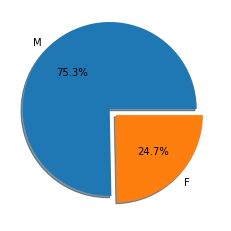

In [86]:
gender_percent = train_set.Gender.value_counts()
plt.pie(gender_percent, explode=[0.1, 0], labels=gender_percent.index, autopct='%1.1f%%',shadow=True);

There are more male buyer than female.

> Who bought more expensive things among the gender?

In [87]:
male_mean_purchase = train_set[train_set.Gender == 'M'].Purchase.mean()
female_mean_purchase = train_set[train_set.Gender == 'F'].Purchase.mean()
print(f'Male Purchase: {male_mean_purchase}')
print(f'Female Purchase: {female_mean_purchase}')

Male Purchase: 9437.526040472265
Female Purchase: 8734.565765155476


## Occupation

This is a numerical column which I think is for a categorical representation of different or common occupation of buyers i.e., it is a masked feature.

> Wich Occupation has the highest buyer?

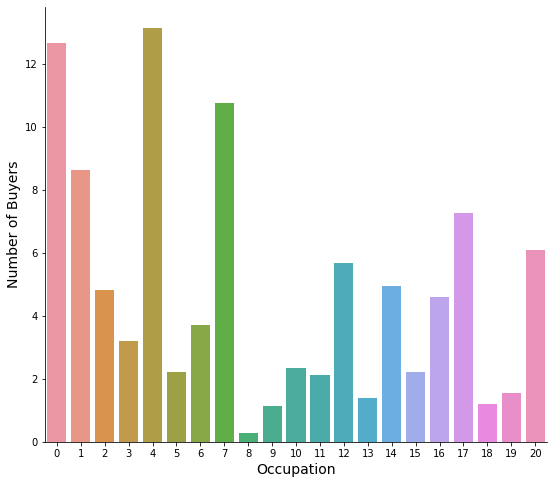

In [206]:
fig, ax = plt.subplots(figsize=(9, 8))
occupation_percent = round(train_set.Occupation.value_counts(normalize=True)*100,2)
sns.barplot(x=occupation_percent.index, y=occupation_percent)
plt.ylabel('Number of Buyers', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
sns.despine();

> Which Occupation bought expensive goods the most?

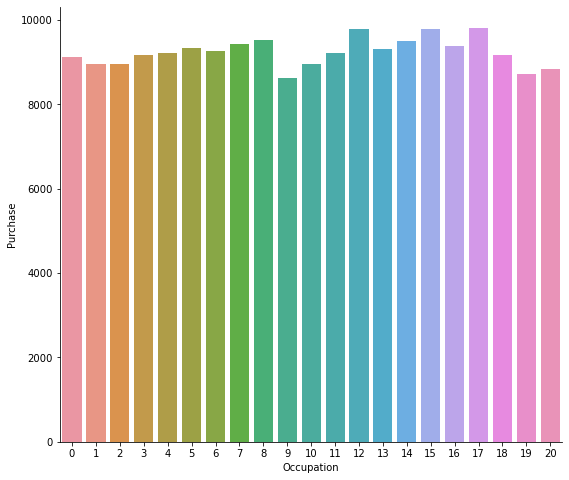

In [89]:
fig, ax = plt.subplots(figsize=(9, 8))
occupation_purchase = train_set.groupby('Occupation')['Purchase'].mean()
sns.barplot(x=occupation_purchase.index, y=occupation_purchase)
sns.despine();

## Age

In [90]:
train_set.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

> Age category that purchase the most?

In [91]:
age_percent = round(train_set.Age.value_counts(normalize=True)*100, 2)

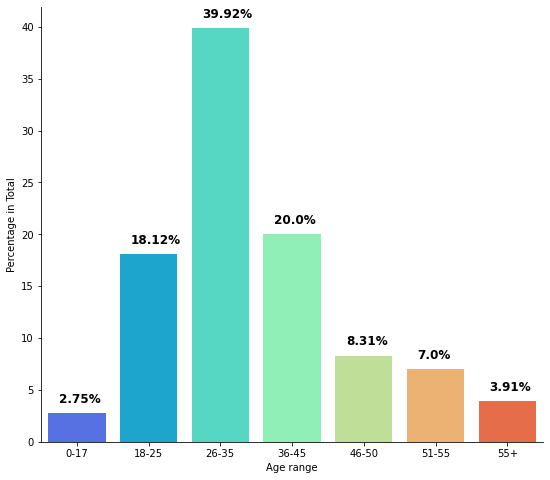

In [92]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(y=age_percent, x=age_percent.index, order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], palette='rainbow')
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+1, str(i.get_height())+'%', fontsize=12, weight='bold',
                color='black')
plt.ylabel('Percentage in Total')
plt.xlabel('Age range')
sns.despine();

> Age category that bought expensive goods mostly?

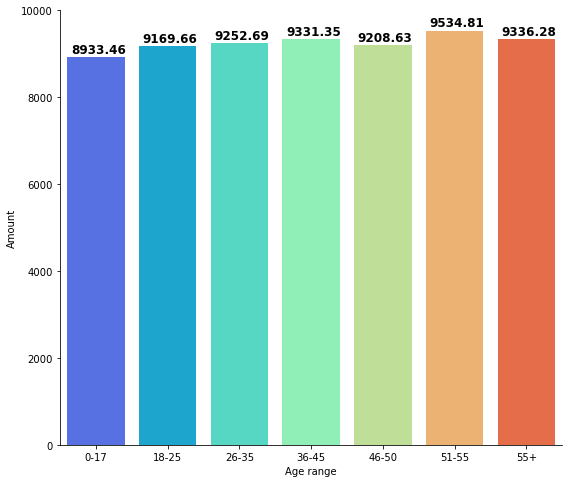

In [93]:
age_expensive = round(train_set.groupby('Age')['Purchase'].mean(), 2)
age_expensive
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(y=age_expensive, x=age_expensive.index, order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], palette='rainbow')
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+90, str(i.get_height()), fontsize=12, weight='bold',
                color='black')
plt.ylabel('Amount')
plt.xlabel('Age range')
sns.despine();

## City Category

> Which city appeared to purchase the most?

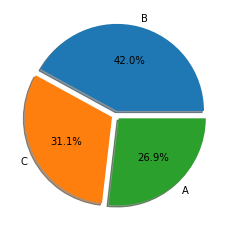

In [94]:
city_cat = train_set.City_Category.value_counts() 
plt.pie(city_cat, explode=[0.05,0.05,0.05], shadow=True, autopct='%1.1f%%', labels=city_cat.index);

> City that bought expensive goods the most?

In [95]:
city_cat_exp = round(train_set.groupby('City_Category')['Purchase'].mean(),2)

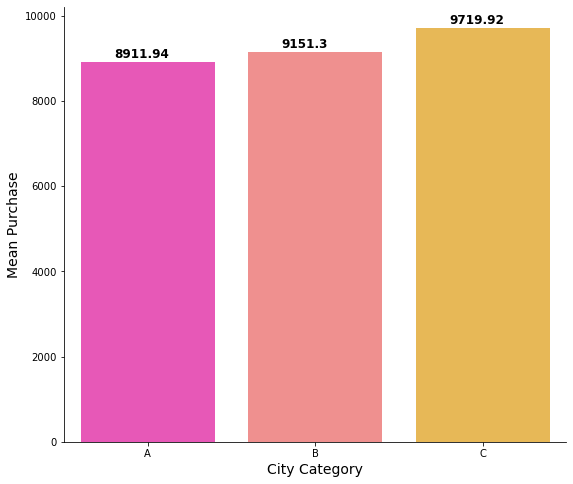

In [96]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(x=city_cat_exp.index, y=city_cat_exp, palette='spring')
for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+100, str(i.get_height()), fontsize=12, weight='bold',
                color='black')
plt.ylabel('Mean Purchase', fontsize=14)
plt.xlabel('City Category', fontsize=14)
sns.despine();

It can be seen that buyers in city C buy more expensive goods compare to other cities

## Stay_In_Current_City_Years

> Does the years of stay in a city have influenced on the number of buyers?

In [98]:
years_purchase = round(train_set.Stay_In_Current_City_Years.value_counts(normalize=True)*100, 2)

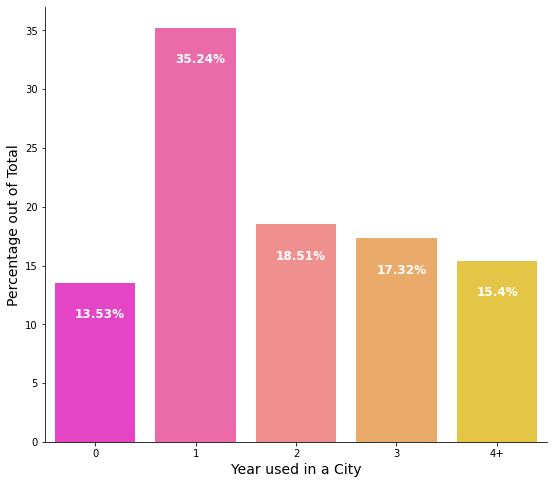

In [99]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(x=years_purchase.index, y=years_purchase, palette='spring', order=['0', '1', '2', '3', '4+'])
for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()-3, str(i.get_height())+'%', fontsize=12, weight='bold',
                color='white')
plt.ylabel('Percentage out of Total', fontsize=14)
plt.xlabel('Year used in a City', fontsize=14)
sns.despine();

This shows no deep relationship between the number of years used in a city and the number of buyers.

There's just a good point in the plot above, more attention need to be on buyers that have used a year and more in a city.

> Which year of stay in a city does buyers bought expensive goods?

In [100]:
city_year_exp = train_set.groupby(['City_Category', 'Stay_In_Current_City_Years'])['Purchase'].mean().reset_index()

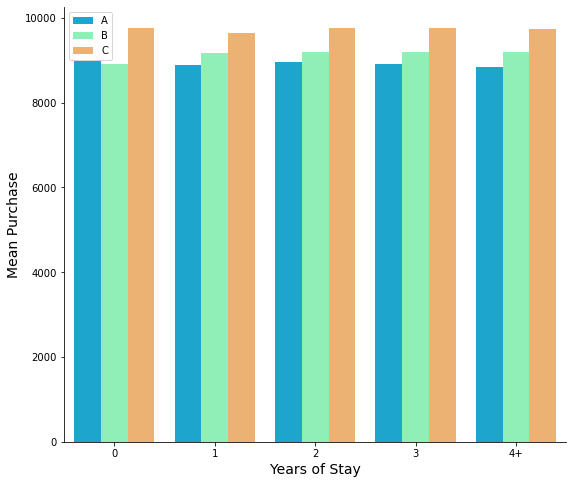

In [101]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(data=city_year_exp, x='Stay_In_Current_City_Years',
           y='Purchase', hue='City_Category', palette='rainbow');
plt.ylabel('Mean Purchase', fontsize=14)
plt.xlabel('Years of Stay', fontsize=14)
plt.legend(loc='best')
sns.despine();

It's almost the same for all the years with respect to the cities but a point could be draw from the plot; Buyers in City C buy more expensive goods for all the possible years of stay in the city.

> Which City those buyers likely stay longer in and does it influence the sales?

In [102]:
city_year = train_set.groupby('City_Category')['Stay_In_Current_City_Years'].value_counts().rename('Count').reset_index()

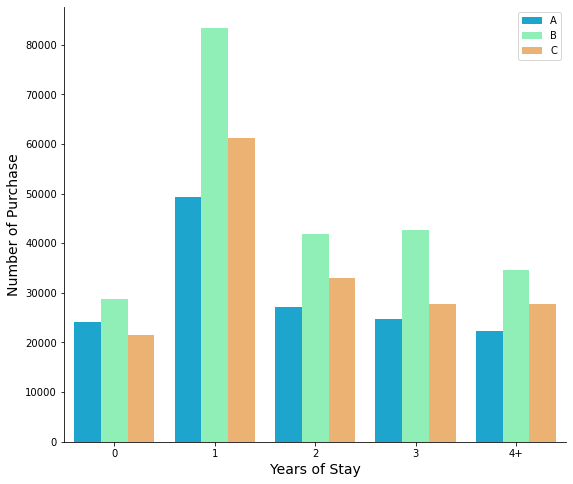

In [103]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(data=city_year, x='Stay_In_Current_City_Years',
           y='Count', hue='City_Category', palette='rainbow', order=['0', '1', '2', '3', '4+']);
plt.ylabel('Number of Purchase', fontsize=14)
plt.xlabel('Years of Stay', fontsize=14)
plt.legend(loc='best')
sns.despine();

As we have seen before, there are more buyers among people who have stayed in the city for 1 year but the majority of the buyers are in City B.

## Marital Status

> Which of the marital status (Married or Single) purchase goods the most?

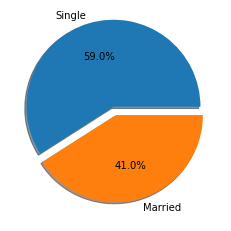

In [104]:
marital_status = train_set.Marital_Status.value_counts()
plt.pie(marital_status, explode=[0.1, 0], shadow=True, autopct='%1.1f%%', labels=['Single', 'Married']);

Single people purchase more goods so, more attention shoulf be focused on them.

In [105]:
marital_status_exp = round(train_set.groupby('Marital_Status')['Purchase'].mean(), 2)
marital_status_exp

Marital_Status
0    9265.91
1    9261.17
Name: Purchase, dtype: float64

Mean of their purchase is quite close meaning, there's a little difference in the cost of goods they purchased.

## Purchase

> Distribution of the purchase

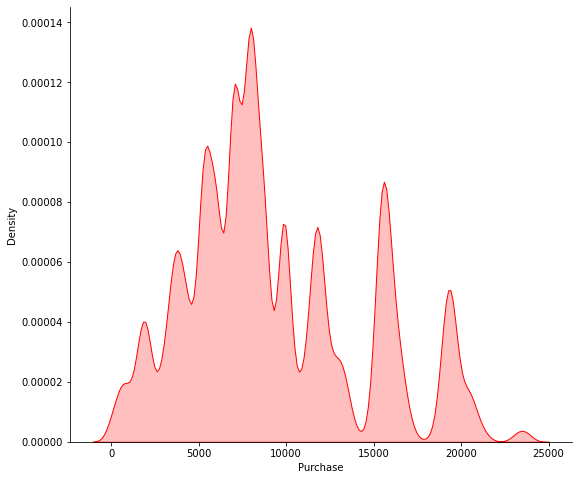

In [106]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.kdeplot(train_set.Purchase, fill=True, color='red')
sns.despine();

This shows us that the number of purchase is higher between the cost of range 5000-10000

> Checking outliers in Purchase

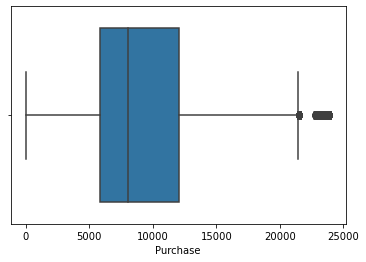

In [107]:
sns.boxplot(x=train_set.Purchase);

> Purchase distribution of the City with the highest number of purchase i.e., City C

In [108]:
city_c_purchase = train_set[train_set.City_Category == 'C'].Purchase

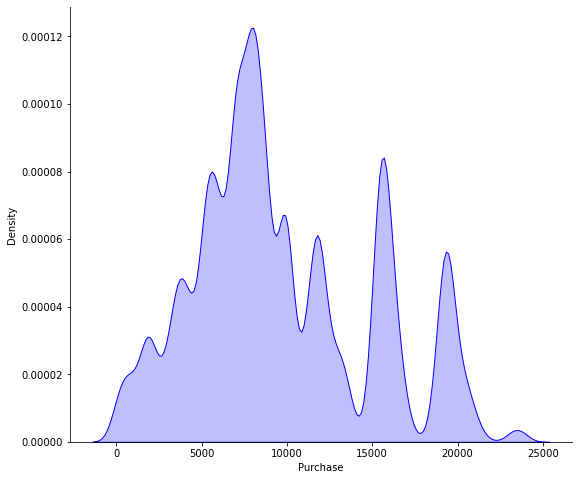

In [109]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.kdeplot(city_c_purchase, fill=True, color='b')
sns.despine();

## Product Category

> Number of items in different section in All Category 

In [110]:
num_item_1 = train_set.groupby('Product_Category_1')['Product_ID'].nunique()
num_item_2 = train_set.groupby('Product_Category_2')['Product_ID'].nunique()

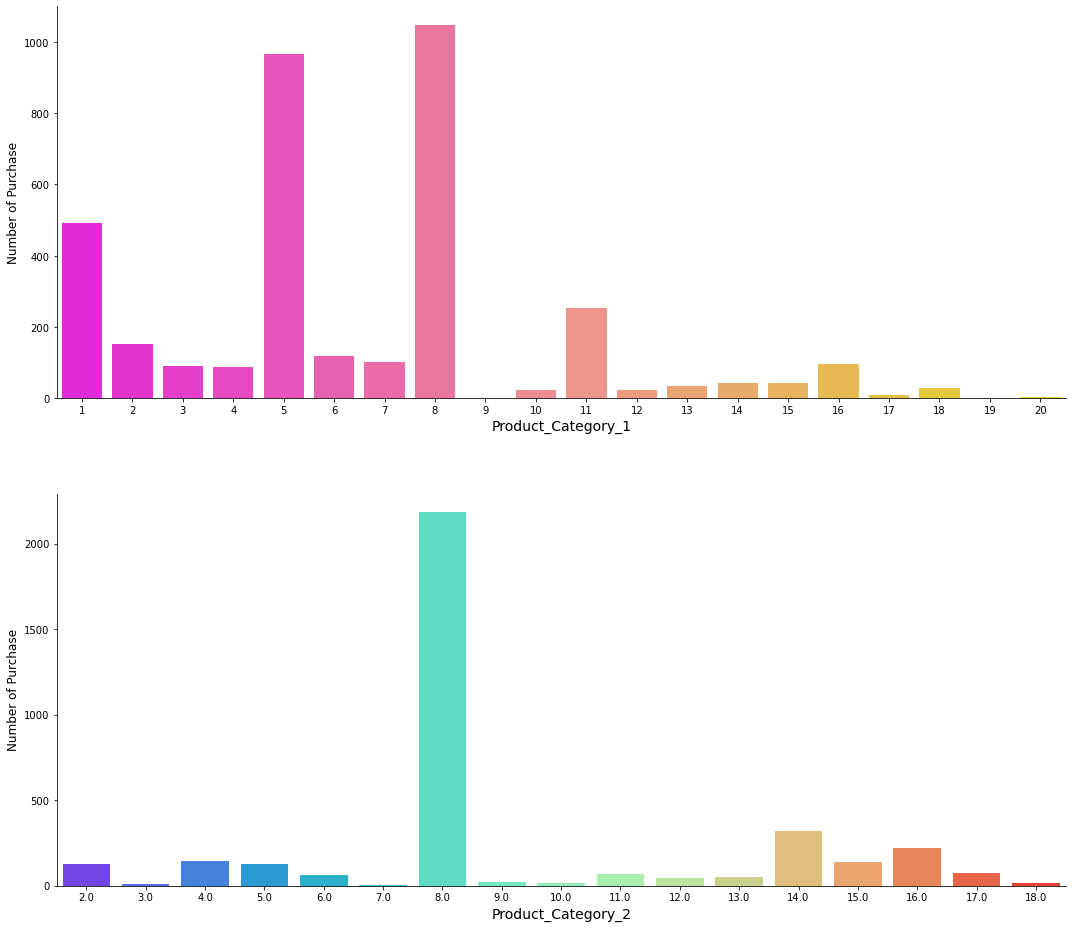

In [111]:
fig, ax = plt.subplots(figsize=(15, 13))
plt.subplot(2,1,1)
sns.barplot(x=num_item_1.index, y=num_item_1, palette='spring')
plt.xlabel('Product_Category_1', fontsize=14)
plt.ylabel('Number of Purchase', fontsize=12)

plt.subplot(2,1,2)
sns.barplot(x=num_item_2.index, y=num_item_2, palette='rainbow')
plt.xlabel('Product_Category_2', fontsize=14)
plt.ylabel('Number of Purchase', fontsize=12)

fig.tight_layout(h_pad=6)
sns.despine();

The above plot also tells about sections in a category and how high their number of purchase.

> Which of the section in each category has most expensive goods?

In [112]:
mean_purchase1 = train_set.groupby('Product_Category_1')['Purchase'].mean()
mean_purchase2 = train_set.groupby('Product_Category_2')['Purchase'].mean()

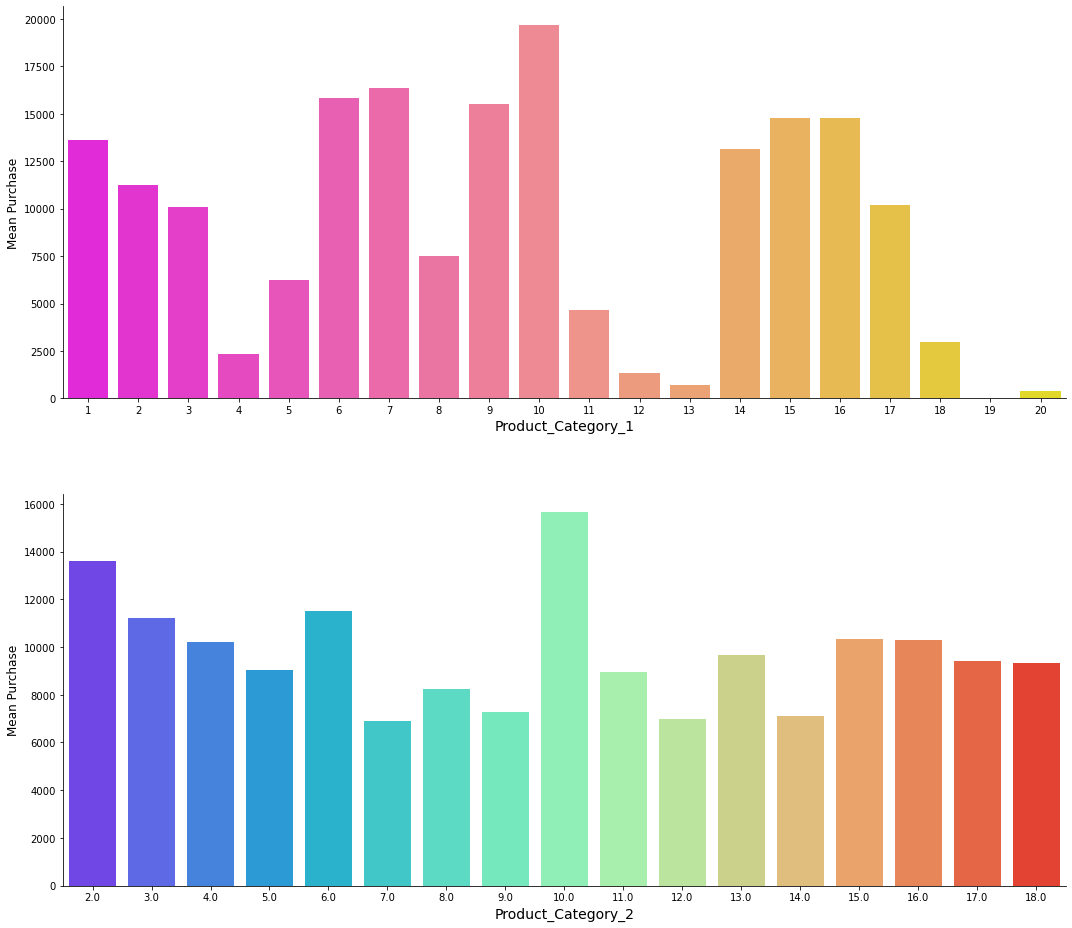

In [113]:
fig, ax = plt.subplots(figsize=(15, 13))
plt.subplot(2,1,1)
sns.barplot(x=mean_purchase1.index, y=mean_purchase1, palette='spring')
plt.xlabel('Product_Category_1', fontsize=14)
plt.ylabel('Mean Purchase', fontsize=12)

plt.subplot(2,1,2)
sns.barplot(x=mean_purchase2.index, y=mean_purchase2, palette='rainbow')
plt.xlabel('Product_Category_2', fontsize=14)
plt.ylabel('Mean Purchase', fontsize=12)

fig.tight_layout(h_pad=6)
sns.despine();

# Columns Selection and Preprocessing of the data

In [4]:
#Having a copy
input_df = input_set.copy()

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
num_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')), 
    #Using the mode to fill the missing value in especially the Product category as it's a masked data.
    ('scaler', StandardScaler())
    ])

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
class process_data(BaseEstimator, TransformerMixin):
    def __init__(self,split_data):
        self.split_data = split_data
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X.Stay_In_Current_City_Years = X.Stay_In_Current_City_Years.replace('4+', '4').astype('int64')
        X = X.drop('Product_Category_3', axis=1)
        num = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
        cat = X.select_dtypes(include='object').columns.to_list()
        cat.remove('Product_ID')
        num.remove('User_ID')
        if self.split_data:
            split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
            for train_index, test_index in split.split(X, X.Gender):
                #Splitting the data based on Gender to limit the biases while splitting
                strat_train_set = X.loc[train_index]
                strat_test_set = X.loc[test_index]
            y_train, y_test = strat_train_set.Purchase, strat_test_set.Purchase
            strat_train_set, strat_test_set = strat_train_set.drop('Purchase', axis=1),\
                                                strat_test_set.drop('Purchase', axis=1)
            num.remove('Purchase')
            full_pipeline = ColumnTransformer([
                ('num_col', num_pipeline, num),
                ('cat_col', OneHotEncoder(), cat)
            ])
            return (full_pipeline.fit_transform(strat_train_set),\
                    full_pipeline.fit_transform(strat_test_set)),(y_train, y_test)
        else:
            full_pipeline = ColumnTransformer([
                ('num_col', num_pipeline, num),
                ('cat_col', OneHotEncoder(), cat)
            ])
            return full_pipeline.fit_transform(X)

In [9]:
import joblib
# process = {
#     'training':process_data(split_data=True),
#     'input_data': process_data(split_data=False)
# }
# joblib.dump(process,'process_data.pkl')

In [10]:
data_processing = joblib.load('process_data.pkl')

In [142]:
#Transform and split the training set
X, y = data_processing['training'].fit_transform(x_train)
X_train, X_test = X
y_train, y_test = y

In [143]:
X_test.shape

(110014, 17)

In [144]:
X_train.shape

(440054, 17)

# Training Different model and their Evaluations

In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [93]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SGDRegressor': SGDRegressor(),
    'DecissionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBRegressor':XGBRegressor(random_state=42),
    'catboost': CatBoostRegressor(random_state=42),
    'LGBMRegressor': LGBMRegressor(random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=42),
    'GradientBoostingRegressor':GradientBoostingRegressor(random_state=42)
}

In [94]:
def models_eval(models, x, y):
    rmse_train, rmse_val,r2, model_name = [], [], [],[]
    for name, model in models.items():
        model_name.append(name) #Saving the name of model
        model.fit(x,y) #Fitting model on training set
        y_pred = model.predict(x) #Making prediction on already seen data
        rmse = np.sqrt(mean_squared_error(y, y_pred)) #Evaluation on training set
        rmse_train.append(rmse)
        r2score = r2_score(y, y_pred) #Computing R2_score
        r2.append(r2score)
        # CrossValidation...
        scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
        rmse_scores = np.sqrt(-scores)
        rmse_val.append(rmse_scores.mean())
    # Create DataFrame for the models and their RMSE values
    eval_df = pd.DataFrame({'RMSE_Train_set':rmse_train, 'RMSE_Val':rmse_val, 'R2_Score':r2},index=model_name)
    return eval_df

In [145]:
eval_df = models_eval(models, X_train, y_train)

Learning rate set to 0.107116
0:	learn: 4754.3978717	total: 136ms	remaining: 2m 15s
1:	learn: 4527.5007616	total: 264ms	remaining: 2m 11s
2:	learn: 4338.1113124	total: 361ms	remaining: 1m 59s
3:	learn: 4186.5209561	total: 467ms	remaining: 1m 56s
4:	learn: 4029.4872712	total: 547ms	remaining: 1m 48s
5:	learn: 3902.8364433	total: 651ms	remaining: 1m 47s
6:	learn: 3786.2576201	total: 727ms	remaining: 1m 43s
7:	learn: 3691.7684825	total: 815ms	remaining: 1m 41s
8:	learn: 3604.4145779	total: 904ms	remaining: 1m 39s
9:	learn: 3540.3683921	total: 993ms	remaining: 1m 38s
10:	learn: 3474.8175856	total: 1.07s	remaining: 1m 36s
11:	learn: 3428.6362361	total: 1.17s	remaining: 1m 36s
12:	learn: 3377.5980670	total: 1.25s	remaining: 1m 34s
13:	learn: 3347.8550295	total: 1.33s	remaining: 1m 33s
14:	learn: 3312.5708827	total: 1.42s	remaining: 1m 33s
15:	learn: 3281.5138574	total: 1.52s	remaining: 1m 33s
16:	learn: 3247.3857698	total: 1.61s	remaining: 1m 32s
17:	learn: 3218.3910117	total: 1.71s	remainin

151:	learn: 2965.8460054	total: 16.6s	remaining: 1m 32s
152:	learn: 2965.7405655	total: 16.7s	remaining: 1m 32s
153:	learn: 2965.5802031	total: 16.8s	remaining: 1m 32s
154:	learn: 2965.3212562	total: 16.9s	remaining: 1m 31s
155:	learn: 2965.0433602	total: 16.9s	remaining: 1m 31s
156:	learn: 2964.8884653	total: 17s	remaining: 1m 31s
157:	learn: 2964.5480443	total: 17.1s	remaining: 1m 31s
158:	learn: 2964.3572861	total: 17.2s	remaining: 1m 30s
159:	learn: 2964.1082909	total: 17.3s	remaining: 1m 30s
160:	learn: 2963.8127224	total: 17.4s	remaining: 1m 30s
161:	learn: 2963.6901405	total: 17.5s	remaining: 1m 30s
162:	learn: 2963.5406501	total: 17.6s	remaining: 1m 30s
163:	learn: 2963.0582912	total: 17.6s	remaining: 1m 29s
164:	learn: 2962.8746980	total: 17.7s	remaining: 1m 29s
165:	learn: 2962.5549528	total: 17.8s	remaining: 1m 29s
166:	learn: 2962.1005164	total: 17.9s	remaining: 1m 29s
167:	learn: 2961.8026802	total: 18s	remaining: 1m 29s
168:	learn: 2961.6758197	total: 18.1s	remaining: 1m 

298:	learn: 2941.2513596	total: 32.3s	remaining: 1m 15s
299:	learn: 2941.2128148	total: 32.4s	remaining: 1m 15s
300:	learn: 2941.0972479	total: 32.4s	remaining: 1m 15s
301:	learn: 2940.9738392	total: 32.5s	remaining: 1m 15s
302:	learn: 2940.8725278	total: 32.6s	remaining: 1m 15s
303:	learn: 2940.7743117	total: 32.7s	remaining: 1m 14s
304:	learn: 2940.7186323	total: 32.8s	remaining: 1m 14s
305:	learn: 2940.6684817	total: 32.9s	remaining: 1m 14s
306:	learn: 2940.4230133	total: 33s	remaining: 1m 14s
307:	learn: 2940.3245780	total: 33.1s	remaining: 1m 14s
308:	learn: 2940.2547416	total: 33.2s	remaining: 1m 14s
309:	learn: 2940.1919769	total: 33.2s	remaining: 1m 14s
310:	learn: 2940.1342618	total: 33.3s	remaining: 1m 13s
311:	learn: 2939.8282754	total: 33.4s	remaining: 1m 13s
312:	learn: 2939.7950555	total: 33.5s	remaining: 1m 13s
313:	learn: 2939.6596737	total: 33.6s	remaining: 1m 13s
314:	learn: 2939.6066493	total: 33.7s	remaining: 1m 13s
315:	learn: 2939.5590777	total: 33.8s	remaining: 1

447:	learn: 2925.9668660	total: 48s	remaining: 59.2s
448:	learn: 2925.9181406	total: 48.2s	remaining: 59.1s
449:	learn: 2925.8311824	total: 48.3s	remaining: 59s
450:	learn: 2925.7734662	total: 48.3s	remaining: 58.8s
451:	learn: 2925.7312083	total: 48.4s	remaining: 58.7s
452:	learn: 2925.6667084	total: 48.5s	remaining: 58.6s
453:	learn: 2925.5437287	total: 48.6s	remaining: 58.5s
454:	learn: 2925.4249744	total: 48.7s	remaining: 58.3s
455:	learn: 2925.2356557	total: 48.8s	remaining: 58.2s
456:	learn: 2925.1627386	total: 48.9s	remaining: 58.1s
457:	learn: 2925.0516229	total: 49s	remaining: 58s
458:	learn: 2924.9326803	total: 49.1s	remaining: 57.8s
459:	learn: 2924.7840380	total: 49.2s	remaining: 57.7s
460:	learn: 2924.7126133	total: 49.2s	remaining: 57.6s
461:	learn: 2924.5853917	total: 49.3s	remaining: 57.5s
462:	learn: 2924.4487801	total: 49.4s	remaining: 57.3s
463:	learn: 2924.4178001	total: 49.5s	remaining: 57.2s
464:	learn: 2924.3047846	total: 49.6s	remaining: 57.1s
465:	learn: 2924.1

599:	learn: 2914.7039607	total: 1m 4s	remaining: 42.8s
600:	learn: 2914.6601276	total: 1m 4s	remaining: 42.7s
601:	learn: 2914.6010729	total: 1m 4s	remaining: 42.6s
602:	learn: 2914.5813625	total: 1m 4s	remaining: 42.5s
603:	learn: 2914.4958432	total: 1m 4s	remaining: 42.4s
604:	learn: 2914.4453287	total: 1m 4s	remaining: 42.3s
605:	learn: 2914.3700213	total: 1m 4s	remaining: 42.1s
606:	learn: 2914.3175941	total: 1m 4s	remaining: 42s
607:	learn: 2914.2707404	total: 1m 4s	remaining: 41.9s
608:	learn: 2914.2465297	total: 1m 5s	remaining: 41.8s
609:	learn: 2914.1711392	total: 1m 5s	remaining: 41.7s
610:	learn: 2914.1174930	total: 1m 5s	remaining: 41.5s
611:	learn: 2914.0748709	total: 1m 5s	remaining: 41.4s
612:	learn: 2914.0509597	total: 1m 5s	remaining: 41.3s
613:	learn: 2913.9016930	total: 1m 5s	remaining: 41.2s
614:	learn: 2913.8553138	total: 1m 5s	remaining: 41.1s
615:	learn: 2913.7970045	total: 1m 5s	remaining: 41s
616:	learn: 2913.7365555	total: 1m 5s	remaining: 40.9s
617:	learn: 29

748:	learn: 2905.4388005	total: 1m 19s	remaining: 26.6s
749:	learn: 2905.4175243	total: 1m 19s	remaining: 26.4s
750:	learn: 2905.3023074	total: 1m 19s	remaining: 26.3s
751:	learn: 2905.2590281	total: 1m 19s	remaining: 26.2s
752:	learn: 2905.2154545	total: 1m 19s	remaining: 26.1s
753:	learn: 2905.1490741	total: 1m 19s	remaining: 26s
754:	learn: 2905.0913086	total: 1m 19s	remaining: 25.9s
755:	learn: 2905.0555867	total: 1m 19s	remaining: 25.8s
756:	learn: 2905.0469703	total: 1m 19s	remaining: 25.7s
757:	learn: 2905.0275523	total: 1m 20s	remaining: 25.5s
758:	learn: 2905.0106991	total: 1m 20s	remaining: 25.4s
759:	learn: 2904.9736916	total: 1m 20s	remaining: 25.3s
760:	learn: 2904.9277399	total: 1m 20s	remaining: 25.2s
761:	learn: 2904.8782169	total: 1m 20s	remaining: 25.1s
762:	learn: 2904.8257349	total: 1m 20s	remaining: 25s
763:	learn: 2904.7770276	total: 1m 20s	remaining: 24.9s
764:	learn: 2904.7397353	total: 1m 20s	remaining: 24.8s
765:	learn: 2904.6625776	total: 1m 20s	remaining: 24

895:	learn: 2898.4190013	total: 1m 35s	remaining: 11.1s
896:	learn: 2898.3648071	total: 1m 36s	remaining: 11.1s
897:	learn: 2898.3057288	total: 1m 36s	remaining: 11s
898:	learn: 2898.2693299	total: 1m 37s	remaining: 10.9s
899:	learn: 2898.1638395	total: 1m 37s	remaining: 10.8s
900:	learn: 2898.1267699	total: 1m 37s	remaining: 10.7s
901:	learn: 2898.0871130	total: 1m 38s	remaining: 10.7s
902:	learn: 2898.0699005	total: 1m 38s	remaining: 10.6s
903:	learn: 2898.0139604	total: 1m 38s	remaining: 10.5s
904:	learn: 2897.9733101	total: 1m 39s	remaining: 10.4s
905:	learn: 2897.9507541	total: 1m 39s	remaining: 10.3s
906:	learn: 2897.8390267	total: 1m 39s	remaining: 10.2s
907:	learn: 2897.8215376	total: 1m 40s	remaining: 10.1s
908:	learn: 2897.7789713	total: 1m 40s	remaining: 10.1s
909:	learn: 2897.7558811	total: 1m 40s	remaining: 9.96s
910:	learn: 2897.7334830	total: 1m 40s	remaining: 9.86s
911:	learn: 2897.6877816	total: 1m 41s	remaining: 9.77s
912:	learn: 2897.6645987	total: 1m 41s	remaining: 

44:	learn: 3031.1776793	total: 3.03s	remaining: 1m 4s
45:	learn: 3030.1547514	total: 3.1s	remaining: 1m 4s
46:	learn: 3026.8922961	total: 3.15s	remaining: 1m 3s
47:	learn: 3023.8135544	total: 3.21s	remaining: 1m 3s
48:	learn: 3022.6746596	total: 3.27s	remaining: 1m 3s
49:	learn: 3021.0109440	total: 3.36s	remaining: 1m 3s
50:	learn: 3019.5146203	total: 3.41s	remaining: 1m 3s
51:	learn: 3018.7423504	total: 3.47s	remaining: 1m 3s
52:	learn: 3017.7709080	total: 3.54s	remaining: 1m 3s
53:	learn: 3016.8097203	total: 3.6s	remaining: 1m 3s
54:	learn: 3016.1051777	total: 3.66s	remaining: 1m 2s
55:	learn: 3014.6789489	total: 3.72s	remaining: 1m 2s
56:	learn: 3014.1184377	total: 3.78s	remaining: 1m 2s
57:	learn: 3011.6739018	total: 3.84s	remaining: 1m 2s
58:	learn: 3010.9449222	total: 3.89s	remaining: 1m 2s
59:	learn: 3010.1745512	total: 3.96s	remaining: 1m 1s
60:	learn: 3009.4445918	total: 4.03s	remaining: 1m 1s
61:	learn: 3007.5809379	total: 4.08s	remaining: 1m 1s
62:	learn: 3007.0131240	total:

197:	learn: 2956.1774520	total: 14.8s	remaining: 1m
198:	learn: 2956.0206666	total: 14.9s	remaining: 1m
199:	learn: 2955.9116057	total: 15s	remaining: 1m
200:	learn: 2955.7743981	total: 15.1s	remaining: 1m
201:	learn: 2955.4023842	total: 15.2s	remaining: 60s
202:	learn: 2955.2451848	total: 15.3s	remaining: 60s
203:	learn: 2955.1281028	total: 15.3s	remaining: 59.9s
204:	learn: 2954.8541557	total: 15.4s	remaining: 59.8s
205:	learn: 2954.7764503	total: 15.5s	remaining: 59.7s
206:	learn: 2954.5280661	total: 15.5s	remaining: 59.5s
207:	learn: 2954.4551075	total: 15.6s	remaining: 59.4s
208:	learn: 2954.1144511	total: 15.7s	remaining: 59.3s
209:	learn: 2953.9869033	total: 15.7s	remaining: 59.1s
210:	learn: 2953.9012750	total: 15.8s	remaining: 59s
211:	learn: 2953.7749374	total: 15.8s	remaining: 58.9s
212:	learn: 2953.6680276	total: 15.9s	remaining: 58.8s
213:	learn: 2953.5250550	total: 16s	remaining: 58.6s
214:	learn: 2953.4704608	total: 16s	remaining: 58.5s
215:	learn: 2953.3277222	total: 16

350:	learn: 2933.2330628	total: 25.7s	remaining: 47.5s
351:	learn: 2933.1653854	total: 25.8s	remaining: 47.4s
352:	learn: 2933.0189626	total: 25.9s	remaining: 47.4s
353:	learn: 2932.8148695	total: 26s	remaining: 47.4s
354:	learn: 2932.7387614	total: 26.1s	remaining: 47.3s
355:	learn: 2932.6902303	total: 26.1s	remaining: 47.3s
356:	learn: 2932.5686428	total: 26.2s	remaining: 47.2s
357:	learn: 2932.4136776	total: 26.3s	remaining: 47.2s
358:	learn: 2932.3053888	total: 26.4s	remaining: 47.1s
359:	learn: 2932.2450181	total: 26.5s	remaining: 47.1s
360:	learn: 2932.0189489	total: 26.6s	remaining: 47s
361:	learn: 2931.7868130	total: 26.6s	remaining: 47s
362:	learn: 2931.6929078	total: 26.7s	remaining: 46.9s
363:	learn: 2931.5247477	total: 26.8s	remaining: 46.9s
364:	learn: 2931.4741540	total: 26.9s	remaining: 46.8s
365:	learn: 2931.3481494	total: 27s	remaining: 46.7s
366:	learn: 2931.1281579	total: 27.1s	remaining: 46.7s
367:	learn: 2931.0195638	total: 27.1s	remaining: 46.6s
368:	learn: 2930.8

500:	learn: 2918.1192214	total: 37.2s	remaining: 37.1s
501:	learn: 2917.9585410	total: 37.3s	remaining: 37s
502:	learn: 2917.8880507	total: 37.4s	remaining: 36.9s
503:	learn: 2917.7983674	total: 37.5s	remaining: 36.9s
504:	learn: 2917.7471796	total: 37.5s	remaining: 36.8s
505:	learn: 2917.6211572	total: 37.6s	remaining: 36.7s
506:	learn: 2917.6129224	total: 37.6s	remaining: 36.6s
507:	learn: 2917.5787130	total: 37.7s	remaining: 36.5s
508:	learn: 2917.5063851	total: 37.8s	remaining: 36.4s
509:	learn: 2917.4491164	total: 37.8s	remaining: 36.4s
510:	learn: 2917.3779174	total: 37.9s	remaining: 36.3s
511:	learn: 2917.2758726	total: 38s	remaining: 36.2s
512:	learn: 2917.2077487	total: 38s	remaining: 36.1s
513:	learn: 2917.0623873	total: 38.1s	remaining: 36s
514:	learn: 2917.0041964	total: 38.1s	remaining: 35.9s
515:	learn: 2916.8878115	total: 38.2s	remaining: 35.8s
516:	learn: 2916.8400197	total: 38.3s	remaining: 35.8s
517:	learn: 2916.7661546	total: 38.3s	remaining: 35.7s
518:	learn: 2916.7

653:	learn: 2907.9783203	total: 49.1s	remaining: 26s
654:	learn: 2907.9294121	total: 49.1s	remaining: 25.9s
655:	learn: 2907.8151239	total: 49.2s	remaining: 25.8s
656:	learn: 2907.6682468	total: 49.3s	remaining: 25.7s
657:	learn: 2907.6442657	total: 49.4s	remaining: 25.7s
658:	learn: 2907.5954195	total: 49.4s	remaining: 25.6s
659:	learn: 2907.5302225	total: 49.5s	remaining: 25.5s
660:	learn: 2907.4443352	total: 49.5s	remaining: 25.4s
661:	learn: 2907.4063677	total: 49.6s	remaining: 25.3s
662:	learn: 2907.3552221	total: 49.7s	remaining: 25.2s
663:	learn: 2907.2441559	total: 49.7s	remaining: 25.2s
664:	learn: 2907.2108499	total: 49.8s	remaining: 25.1s
665:	learn: 2907.1804018	total: 49.8s	remaining: 25s
666:	learn: 2907.1192842	total: 49.9s	remaining: 24.9s
667:	learn: 2907.0302184	total: 50s	remaining: 24.8s
668:	learn: 2906.9648983	total: 50s	remaining: 24.8s
669:	learn: 2906.9396420	total: 50.1s	remaining: 24.7s
670:	learn: 2906.8899620	total: 50.2s	remaining: 24.6s
671:	learn: 2906.8

806:	learn: 2898.9921691	total: 1m	remaining: 14.4s
807:	learn: 2898.9533815	total: 1m	remaining: 14.4s
808:	learn: 2898.9098061	total: 1m	remaining: 14.3s
809:	learn: 2898.8574710	total: 1m	remaining: 14.2s
810:	learn: 2898.7733004	total: 1m	remaining: 14.1s
811:	learn: 2898.7054085	total: 1m	remaining: 14.1s
812:	learn: 2898.6729569	total: 1m	remaining: 14s
813:	learn: 2898.6183348	total: 1m	remaining: 13.9s
814:	learn: 2898.5421246	total: 1m 1s	remaining: 13.9s
815:	learn: 2898.5082525	total: 1m 1s	remaining: 13.8s
816:	learn: 2898.4932192	total: 1m 1s	remaining: 13.7s
817:	learn: 2898.4323092	total: 1m 1s	remaining: 13.6s
818:	learn: 2898.3115529	total: 1m 1s	remaining: 13.6s
819:	learn: 2898.2645783	total: 1m 1s	remaining: 13.5s
820:	learn: 2898.1560716	total: 1m 1s	remaining: 13.4s
821:	learn: 2898.1301452	total: 1m 1s	remaining: 13.4s
822:	learn: 2898.0425110	total: 1m 1s	remaining: 13.3s
823:	learn: 2897.9455901	total: 1m 1s	remaining: 13.2s
824:	learn: 2897.8980751	total: 1m 1

958:	learn: 2891.1251150	total: 1m 10s	remaining: 3.03s
959:	learn: 2891.0664971	total: 1m 11s	remaining: 2.96s
960:	learn: 2891.0100744	total: 1m 11s	remaining: 2.89s
961:	learn: 2890.9638447	total: 1m 11s	remaining: 2.81s
962:	learn: 2890.9140487	total: 1m 11s	remaining: 2.74s
963:	learn: 2890.8837515	total: 1m 11s	remaining: 2.66s
964:	learn: 2890.8474608	total: 1m 11s	remaining: 2.59s
965:	learn: 2890.8075246	total: 1m 11s	remaining: 2.52s
966:	learn: 2890.7741423	total: 1m 11s	remaining: 2.44s
967:	learn: 2890.7638654	total: 1m 11s	remaining: 2.37s
968:	learn: 2890.7462983	total: 1m 11s	remaining: 2.29s
969:	learn: 2890.7371556	total: 1m 11s	remaining: 2.22s
970:	learn: 2890.7018595	total: 1m 11s	remaining: 2.14s
971:	learn: 2890.6295043	total: 1m 11s	remaining: 2.07s
972:	learn: 2890.5540624	total: 1m 11s	remaining: 1.99s
973:	learn: 2890.5165968	total: 1m 11s	remaining: 1.92s
974:	learn: 2890.4783044	total: 1m 12s	remaining: 1.85s
975:	learn: 2890.4375384	total: 1m 12s	remaining

110:	learn: 2981.1587200	total: 7.73s	remaining: 1m 1s
111:	learn: 2980.8324594	total: 7.81s	remaining: 1m 1s
112:	learn: 2980.2859290	total: 7.87s	remaining: 1m 1s
113:	learn: 2979.8465721	total: 7.92s	remaining: 1m 1s
114:	learn: 2979.4336599	total: 7.99s	remaining: 1m 1s
115:	learn: 2978.9567585	total: 8.06s	remaining: 1m 1s
116:	learn: 2978.8195826	total: 8.12s	remaining: 1m 1s
117:	learn: 2978.2798640	total: 8.17s	remaining: 1m 1s
118:	learn: 2977.9200337	total: 8.24s	remaining: 1m
119:	learn: 2977.4218520	total: 8.3s	remaining: 1m
120:	learn: 2977.0337100	total: 8.36s	remaining: 1m
121:	learn: 2976.7047614	total: 8.43s	remaining: 1m
122:	learn: 2976.4947956	total: 8.54s	remaining: 1m
123:	learn: 2976.1336037	total: 8.65s	remaining: 1m 1s
124:	learn: 2975.9261171	total: 8.73s	remaining: 1m 1s
125:	learn: 2975.4386279	total: 8.84s	remaining: 1m 1s
126:	learn: 2975.1637265	total: 8.92s	remaining: 1m 1s
127:	learn: 2974.8332718	total: 8.99s	remaining: 1m 1s
128:	learn: 2974.6242555	t

262:	learn: 2946.2029975	total: 19.8s	remaining: 55.5s
263:	learn: 2946.1254966	total: 19.9s	remaining: 55.3s
264:	learn: 2946.0803041	total: 19.9s	remaining: 55.2s
265:	learn: 2946.0029826	total: 20s	remaining: 55.1s
266:	learn: 2945.6825043	total: 20.1s	remaining: 55.1s
267:	learn: 2945.5503226	total: 20.1s	remaining: 55s
268:	learn: 2945.4766564	total: 20.2s	remaining: 54.8s
269:	learn: 2945.3097430	total: 20.2s	remaining: 54.7s
270:	learn: 2945.0821704	total: 20.3s	remaining: 54.6s
271:	learn: 2944.9665275	total: 20.4s	remaining: 54.5s
272:	learn: 2944.8734378	total: 20.4s	remaining: 54.4s
273:	learn: 2944.7758405	total: 20.5s	remaining: 54.3s
274:	learn: 2944.6800960	total: 20.6s	remaining: 54.2s
275:	learn: 2944.4966053	total: 20.6s	remaining: 54.1s
276:	learn: 2944.4175245	total: 20.7s	remaining: 54s
277:	learn: 2944.3103794	total: 20.7s	remaining: 53.9s
278:	learn: 2944.2578985	total: 20.8s	remaining: 53.8s
279:	learn: 2944.2226024	total: 20.9s	remaining: 53.7s
280:	learn: 2944

413:	learn: 2927.4490534	total: 31.7s	remaining: 44.9s
414:	learn: 2927.3792157	total: 31.8s	remaining: 44.8s
415:	learn: 2927.2968336	total: 31.8s	remaining: 44.7s
416:	learn: 2927.2783296	total: 31.9s	remaining: 44.6s
417:	learn: 2927.1724092	total: 32s	remaining: 44.5s
418:	learn: 2927.0179815	total: 32.1s	remaining: 44.5s
419:	learn: 2926.9810973	total: 32.1s	remaining: 44.3s
420:	learn: 2926.9372604	total: 32.2s	remaining: 44.3s
421:	learn: 2926.8741171	total: 32.2s	remaining: 44.2s
422:	learn: 2926.7892537	total: 32.3s	remaining: 44.1s
423:	learn: 2926.7185386	total: 32.4s	remaining: 44s
424:	learn: 2926.6461647	total: 32.4s	remaining: 43.9s
425:	learn: 2926.5375512	total: 32.5s	remaining: 43.8s
426:	learn: 2926.4473243	total: 32.6s	remaining: 43.7s
427:	learn: 2926.3264971	total: 32.6s	remaining: 43.6s
428:	learn: 2926.2101033	total: 32.7s	remaining: 43.5s
429:	learn: 2926.1429154	total: 32.7s	remaining: 43.4s
430:	learn: 2926.0675009	total: 32.8s	remaining: 43.3s
431:	learn: 29

564:	learn: 2914.6662635	total: 42.6s	remaining: 32.8s
565:	learn: 2914.4821584	total: 42.7s	remaining: 32.8s
566:	learn: 2914.3629174	total: 42.8s	remaining: 32.7s
567:	learn: 2914.2830399	total: 42.9s	remaining: 32.6s
568:	learn: 2914.2071213	total: 43s	remaining: 32.6s
569:	learn: 2914.0943667	total: 43.1s	remaining: 32.5s
570:	learn: 2914.0520097	total: 43.2s	remaining: 32.4s
571:	learn: 2914.0119415	total: 43.3s	remaining: 32.4s
572:	learn: 2913.9229396	total: 43.3s	remaining: 32.3s
573:	learn: 2913.8195934	total: 43.4s	remaining: 32.2s
574:	learn: 2913.7371036	total: 43.5s	remaining: 32.2s
575:	learn: 2913.5977813	total: 43.6s	remaining: 32.1s
576:	learn: 2913.5292938	total: 43.7s	remaining: 32s
577:	learn: 2913.4756667	total: 43.8s	remaining: 32s
578:	learn: 2913.3936177	total: 43.9s	remaining: 31.9s
579:	learn: 2913.3428207	total: 44s	remaining: 31.8s
580:	learn: 2913.3064523	total: 44s	remaining: 31.8s
581:	learn: 2913.2210717	total: 44.1s	remaining: 31.7s
582:	learn: 2913.154

718:	learn: 2904.3738291	total: 54.2s	remaining: 21.2s
719:	learn: 2904.3257038	total: 54.2s	remaining: 21.1s
720:	learn: 2904.2831239	total: 54.3s	remaining: 21s
721:	learn: 2904.2347457	total: 54.4s	remaining: 20.9s
722:	learn: 2904.0115708	total: 54.4s	remaining: 20.9s
723:	learn: 2903.9879209	total: 54.5s	remaining: 20.8s
724:	learn: 2903.9330149	total: 54.5s	remaining: 20.7s
725:	learn: 2903.8892817	total: 54.6s	remaining: 20.6s
726:	learn: 2903.8539529	total: 54.7s	remaining: 20.5s
727:	learn: 2903.8191622	total: 54.7s	remaining: 20.5s
728:	learn: 2903.7604939	total: 54.8s	remaining: 20.4s
729:	learn: 2903.7172488	total: 54.9s	remaining: 20.3s
730:	learn: 2903.6877194	total: 54.9s	remaining: 20.2s
731:	learn: 2903.6349416	total: 55s	remaining: 20.1s
732:	learn: 2903.5967736	total: 55s	remaining: 20s
733:	learn: 2903.5636124	total: 55.1s	remaining: 20s
734:	learn: 2903.5012487	total: 55.2s	remaining: 19.9s
735:	learn: 2903.3871553	total: 55.2s	remaining: 19.8s
736:	learn: 2903.343

869:	learn: 2895.6791517	total: 1m 7s	remaining: 10.1s
870:	learn: 2895.6372971	total: 1m 7s	remaining: 10.1s
871:	learn: 2895.5814793	total: 1m 7s	remaining: 9.97s
872:	learn: 2895.5417895	total: 1m 8s	remaining: 9.9s
873:	learn: 2895.4903097	total: 1m 8s	remaining: 9.82s
874:	learn: 2895.4307262	total: 1m 8s	remaining: 9.74s
875:	learn: 2895.3824866	total: 1m 8s	remaining: 9.65s
876:	learn: 2895.3345912	total: 1m 8s	remaining: 9.58s
877:	learn: 2895.3118181	total: 1m 8s	remaining: 9.49s
878:	learn: 2895.2602804	total: 1m 8s	remaining: 9.42s
879:	learn: 2895.1689076	total: 1m 8s	remaining: 9.34s
880:	learn: 2895.0125323	total: 1m 8s	remaining: 9.26s
881:	learn: 2894.9772889	total: 1m 8s	remaining: 9.18s
882:	learn: 2894.8709202	total: 1m 8s	remaining: 9.1s
883:	learn: 2894.8464743	total: 1m 8s	remaining: 9.02s
884:	learn: 2894.8107216	total: 1m 8s	remaining: 8.94s
885:	learn: 2894.6904448	total: 1m 8s	remaining: 8.86s
886:	learn: 2894.6338134	total: 1m 8s	remaining: 8.78s
887:	learn: 

18:	learn: 3227.2492741	total: 1.28s	remaining: 1m 6s
19:	learn: 3199.2899486	total: 1.34s	remaining: 1m 5s
20:	learn: 3184.7665814	total: 1.41s	remaining: 1m 5s
21:	learn: 3172.9847559	total: 1.48s	remaining: 1m 5s
22:	learn: 3161.2442427	total: 1.54s	remaining: 1m 5s
23:	learn: 3141.5308935	total: 1.6s	remaining: 1m 5s
24:	learn: 3132.9691838	total: 1.66s	remaining: 1m 4s
25:	learn: 3116.9967105	total: 1.71s	remaining: 1m 4s
26:	learn: 3102.5681740	total: 1.78s	remaining: 1m 4s
27:	learn: 3092.0846389	total: 1.84s	remaining: 1m 3s
28:	learn: 3086.6604425	total: 1.89s	remaining: 1m 3s
29:	learn: 3081.3380917	total: 1.95s	remaining: 1m 3s
30:	learn: 3073.0852565	total: 2.01s	remaining: 1m 2s
31:	learn: 3065.8973805	total: 2.08s	remaining: 1m 2s
32:	learn: 3063.5213973	total: 2.13s	remaining: 1m 2s
33:	learn: 3059.6815505	total: 2.21s	remaining: 1m 2s
34:	learn: 3054.5166266	total: 2.27s	remaining: 1m 2s
35:	learn: 3052.4725974	total: 2.32s	remaining: 1m 2s
36:	learn: 3049.9916906	total

171:	learn: 2962.5323508	total: 13s	remaining: 1m 2s
172:	learn: 2962.3741209	total: 13.1s	remaining: 1m 2s
173:	learn: 2962.1812474	total: 13.2s	remaining: 1m 2s
174:	learn: 2962.0188027	total: 13.3s	remaining: 1m 2s
175:	learn: 2961.8279943	total: 13.3s	remaining: 1m 2s
176:	learn: 2961.6419791	total: 13.4s	remaining: 1m 2s
177:	learn: 2961.5488215	total: 13.5s	remaining: 1m 2s
178:	learn: 2961.4133349	total: 13.5s	remaining: 1m 1s
179:	learn: 2961.2550095	total: 13.6s	remaining: 1m 1s
180:	learn: 2961.1555228	total: 13.6s	remaining: 1m 1s
181:	learn: 2961.0097231	total: 13.7s	remaining: 1m 1s
182:	learn: 2960.7679707	total: 13.8s	remaining: 1m 1s
183:	learn: 2960.6022242	total: 13.8s	remaining: 1m 1s
184:	learn: 2960.4931172	total: 13.9s	remaining: 1m 1s
185:	learn: 2960.2996659	total: 14s	remaining: 1m 1s
186:	learn: 2960.1771135	total: 14s	remaining: 1m
187:	learn: 2960.0082217	total: 14.1s	remaining: 1m
188:	learn: 2959.7861609	total: 14.1s	remaining: 1m
189:	learn: 2959.4943002	

323:	learn: 2938.1565136	total: 24.1s	remaining: 50.4s
324:	learn: 2938.0140264	total: 24.2s	remaining: 50.4s
325:	learn: 2937.9706143	total: 24.3s	remaining: 50.3s
326:	learn: 2937.9086714	total: 24.4s	remaining: 50.3s
327:	learn: 2937.8207901	total: 24.5s	remaining: 50.2s
328:	learn: 2937.7178798	total: 24.6s	remaining: 50.2s
329:	learn: 2937.6661635	total: 24.7s	remaining: 50.1s
330:	learn: 2937.4986645	total: 24.8s	remaining: 50.1s
331:	learn: 2937.3773587	total: 24.8s	remaining: 50s
332:	learn: 2937.3243337	total: 24.9s	remaining: 49.9s
333:	learn: 2937.2430568	total: 25s	remaining: 49.9s
334:	learn: 2937.1433234	total: 25.1s	remaining: 49.8s
335:	learn: 2937.0449415	total: 25.2s	remaining: 49.8s
336:	learn: 2936.9628791	total: 25.3s	remaining: 49.7s
337:	learn: 2936.8656904	total: 25.4s	remaining: 49.7s
338:	learn: 2936.7878923	total: 25.4s	remaining: 49.6s
339:	learn: 2936.5671723	total: 25.5s	remaining: 49.5s
340:	learn: 2936.4074856	total: 25.6s	remaining: 49.5s
341:	learn: 29

474:	learn: 2923.0453228	total: 34.9s	remaining: 38.6s
475:	learn: 2922.9709145	total: 35s	remaining: 38.5s
476:	learn: 2922.9004856	total: 35s	remaining: 38.4s
477:	learn: 2922.8441055	total: 35.1s	remaining: 38.3s
478:	learn: 2922.7731248	total: 35.2s	remaining: 38.3s
479:	learn: 2922.7367216	total: 35.2s	remaining: 38.2s
480:	learn: 2922.6344005	total: 35.3s	remaining: 38.1s
481:	learn: 2922.5746210	total: 35.4s	remaining: 38s
482:	learn: 2922.5097787	total: 35.4s	remaining: 37.9s
483:	learn: 2922.3414918	total: 35.5s	remaining: 37.8s
484:	learn: 2922.2878491	total: 35.5s	remaining: 37.7s
485:	learn: 2922.2599673	total: 35.6s	remaining: 37.6s
486:	learn: 2922.1963898	total: 35.7s	remaining: 37.6s
487:	learn: 2922.1082236	total: 35.7s	remaining: 37.5s
488:	learn: 2922.0508035	total: 35.8s	remaining: 37.4s
489:	learn: 2921.8355984	total: 35.9s	remaining: 37.4s
490:	learn: 2921.7054798	total: 36s	remaining: 37.3s
491:	learn: 2921.5753177	total: 36.1s	remaining: 37.2s
492:	learn: 2921.4

628:	learn: 2910.8066045	total: 47.3s	remaining: 27.9s
629:	learn: 2910.7892656	total: 47.3s	remaining: 27.8s
630:	learn: 2910.7360077	total: 47.4s	remaining: 27.7s
631:	learn: 2910.6889715	total: 47.5s	remaining: 27.6s
632:	learn: 2910.6087731	total: 47.6s	remaining: 27.6s
633:	learn: 2910.5287188	total: 47.6s	remaining: 27.5s
634:	learn: 2910.5064592	total: 47.7s	remaining: 27.4s
635:	learn: 2910.4733233	total: 47.8s	remaining: 27.4s
636:	learn: 2910.3830032	total: 47.9s	remaining: 27.3s
637:	learn: 2910.3231917	total: 47.9s	remaining: 27.2s
638:	learn: 2910.2533624	total: 48s	remaining: 27.1s
639:	learn: 2910.1999128	total: 48.1s	remaining: 27s
640:	learn: 2910.0806484	total: 48.1s	remaining: 27s
641:	learn: 2909.9998422	total: 48.2s	remaining: 26.9s
642:	learn: 2909.9416720	total: 48.3s	remaining: 26.8s
643:	learn: 2909.9205713	total: 48.3s	remaining: 26.7s
644:	learn: 2909.8674205	total: 48.4s	remaining: 26.6s
645:	learn: 2909.7150546	total: 48.5s	remaining: 26.6s
646:	learn: 2909

781:	learn: 2901.6175324	total: 59.2s	remaining: 16.5s
782:	learn: 2901.5688293	total: 59.3s	remaining: 16.4s
783:	learn: 2901.4638777	total: 59.4s	remaining: 16.4s
784:	learn: 2901.4206693	total: 59.5s	remaining: 16.3s
785:	learn: 2901.3265809	total: 59.6s	remaining: 16.2s
786:	learn: 2901.2492730	total: 59.6s	remaining: 16.1s
787:	learn: 2901.2076197	total: 59.7s	remaining: 16.1s
788:	learn: 2901.1741541	total: 59.8s	remaining: 16s
789:	learn: 2901.1239400	total: 59.8s	remaining: 15.9s
790:	learn: 2901.1039967	total: 59.9s	remaining: 15.8s
791:	learn: 2901.0293359	total: 59.9s	remaining: 15.7s
792:	learn: 2900.9645737	total: 60s	remaining: 15.7s
793:	learn: 2900.9169745	total: 1m	remaining: 15.6s
794:	learn: 2900.8645922	total: 1m	remaining: 15.5s
795:	learn: 2900.8117609	total: 1m	remaining: 15.4s
796:	learn: 2900.7885385	total: 1m	remaining: 15.3s
797:	learn: 2900.7202073	total: 1m	remaining: 15.3s
798:	learn: 2900.6794219	total: 1m	remaining: 15.2s
799:	learn: 2900.6380310	total: 

933:	learn: 2893.3244704	total: 1m 9s	remaining: 4.91s
934:	learn: 2893.3051075	total: 1m 9s	remaining: 4.83s
935:	learn: 2893.2497272	total: 1m 9s	remaining: 4.76s
936:	learn: 2893.2116728	total: 1m 9s	remaining: 4.69s
937:	learn: 2893.1455905	total: 1m 9s	remaining: 4.61s
938:	learn: 2893.0932769	total: 1m 9s	remaining: 4.54s
939:	learn: 2893.0009702	total: 1m 9s	remaining: 4.46s
940:	learn: 2892.9139182	total: 1m 10s	remaining: 4.39s
941:	learn: 2892.8613035	total: 1m 10s	remaining: 4.32s
942:	learn: 2892.8349035	total: 1m 10s	remaining: 4.24s
943:	learn: 2892.7936691	total: 1m 10s	remaining: 4.17s
944:	learn: 2892.7510561	total: 1m 10s	remaining: 4.09s
945:	learn: 2892.7049800	total: 1m 10s	remaining: 4.02s
946:	learn: 2892.6660884	total: 1m 10s	remaining: 3.95s
947:	learn: 2892.6218949	total: 1m 10s	remaining: 3.87s
948:	learn: 2892.5562603	total: 1m 10s	remaining: 3.8s
949:	learn: 2892.4981755	total: 1m 10s	remaining: 3.72s
950:	learn: 2892.4270492	total: 1m 10s	remaining: 3.65s


In [146]:
eval_df.to_pickle('Model_evaluation.pkl')
pd.read_pickle('Model_evaluation.pkl')

,RMSE_Train_set,RMSE_Val,R2_Score
LinearRegression,4695.333688,4695.540373,0.125898
Ridge,4695.324174,4695.500107,0.125902
Lasso,4695.336454,4695.504905,0.125897
ElasticNet,4735.198542,4735.276315,0.110992
SGDRegressor,4696.842675,4697.128056,0.125336
DecissionTree,2545.736478,3220.852497,0.743046
RandomForest,2569.048968,3050.197054,0.738318
XGBRegressor,2889.064100,2921.762067,0.669064
catboost,2894.100295,2921.854865,0.667910
LGBMRegressor,2945.173490,2952.340213,0.656085


### NB:
Decision Tree and Random Forest have the lowest cost and highest R2_score among the models (DecisionTree has the lowest RMSE) but badly overfitting the training set i.e., generalizing badly on the validation set.

XGBRegressor and catboost look promising among the models even though the two models mentioned above has higher R2_score compare to them. Their overfitting problem is quite little (compare to Decision Tree and Random Forest) which we can simply be solve by fine-tuning the model.

# Fine-Tuning the best model

**Selected best models:**

- XGBRegressor
- catboost

> **XGBRegressor**

In [147]:
xgbr = XGBRegressor(max_depth = 7, learning_rate = 0.1, n_estimators = 1000, random_state =42)
scores = cross_val_score(xgbr, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
rmse_scores = np.sqrt(-scores)

In [148]:
print(f'RMSE:{rmse_scores.mean()}')

RMSE:2910.036333241685


> **Catboost**

In [149]:
cat = CatBoostRegressor(max_depth=7, learning_rate=0.1, n_estimators=1500, random_state=42)
scores = cross_val_score(cat, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
cat_rmse_scores = np.sqrt(-scores)

0:	learn: 4754.7497740	total: 63.9ms	remaining: 1m 35s
1:	learn: 4525.8767118	total: 130ms	remaining: 1m 37s
2:	learn: 4327.4435736	total: 190ms	remaining: 1m 34s
3:	learn: 4157.7879063	total: 251ms	remaining: 1m 33s
4:	learn: 3993.6295836	total: 334ms	remaining: 1m 39s
5:	learn: 3861.8754066	total: 397ms	remaining: 1m 38s
6:	learn: 3751.3847646	total: 464ms	remaining: 1m 38s
7:	learn: 3641.1781764	total: 522ms	remaining: 1m 37s
8:	learn: 3563.2088522	total: 595ms	remaining: 1m 38s
9:	learn: 3499.3835593	total: 659ms	remaining: 1m 38s
10:	learn: 3444.8118268	total: 727ms	remaining: 1m 38s
11:	learn: 3379.7079366	total: 791ms	remaining: 1m 38s
12:	learn: 3329.4080909	total: 860ms	remaining: 1m 38s
13:	learn: 3297.9261964	total: 925ms	remaining: 1m 38s
14:	learn: 3264.4437205	total: 991ms	remaining: 1m 38s
15:	learn: 3225.5015899	total: 1.05s	remaining: 1m 37s
16:	learn: 3202.8310093	total: 1.12s	remaining: 1m 37s
17:	learn: 3175.0440675	total: 1.19s	remaining: 1m 38s
18:	learn: 3161.130

150:	learn: 2953.8113569	total: 13.1s	remaining: 1m 57s
151:	learn: 2953.5916795	total: 13.2s	remaining: 1m 57s
152:	learn: 2953.4692347	total: 13.3s	remaining: 1m 56s
153:	learn: 2952.6600508	total: 13.4s	remaining: 1m 56s
154:	learn: 2952.5476196	total: 13.4s	remaining: 1m 56s
155:	learn: 2952.4361272	total: 13.5s	remaining: 1m 56s
156:	learn: 2952.0121726	total: 13.6s	remaining: 1m 55s
157:	learn: 2951.4992525	total: 13.6s	remaining: 1m 55s
158:	learn: 2951.1642477	total: 13.7s	remaining: 1m 55s
159:	learn: 2950.9613138	total: 13.8s	remaining: 1m 55s
160:	learn: 2950.5380182	total: 13.8s	remaining: 1m 55s
161:	learn: 2950.4131852	total: 13.9s	remaining: 1m 54s
162:	learn: 2950.1315045	total: 14s	remaining: 1m 54s
163:	learn: 2949.9509724	total: 14s	remaining: 1m 54s
164:	learn: 2949.8342584	total: 14.1s	remaining: 1m 54s
165:	learn: 2949.1529277	total: 14.2s	remaining: 1m 53s
166:	learn: 2948.9594794	total: 14.2s	remaining: 1m 53s
167:	learn: 2948.8276056	total: 14.3s	remaining: 1m 

298:	learn: 2919.7851807	total: 25.2s	remaining: 1m 41s
299:	learn: 2919.5823228	total: 25.3s	remaining: 1m 41s
300:	learn: 2919.3813468	total: 25.4s	remaining: 1m 41s
301:	learn: 2919.3526416	total: 25.5s	remaining: 1m 41s
302:	learn: 2919.1175120	total: 25.6s	remaining: 1m 41s
303:	learn: 2918.9730244	total: 25.7s	remaining: 1m 40s
304:	learn: 2918.8507916	total: 25.7s	remaining: 1m 40s
305:	learn: 2918.6285525	total: 25.8s	remaining: 1m 40s
306:	learn: 2918.4765376	total: 25.9s	remaining: 1m 40s
307:	learn: 2918.2451871	total: 26s	remaining: 1m 40s
308:	learn: 2918.1557643	total: 26.1s	remaining: 1m 40s
309:	learn: 2917.8863152	total: 26.2s	remaining: 1m 40s
310:	learn: 2917.6875434	total: 26.3s	remaining: 1m 40s
311:	learn: 2917.5857256	total: 26.3s	remaining: 1m 40s
312:	learn: 2917.3570110	total: 26.4s	remaining: 1m 40s
313:	learn: 2917.2678886	total: 26.5s	remaining: 1m 40s
314:	learn: 2917.0127082	total: 26.6s	remaining: 1m 40s
315:	learn: 2916.7634690	total: 26.7s	remaining: 1

446:	learn: 2898.9282395	total: 36.4s	remaining: 1m 25s
447:	learn: 2898.7385391	total: 36.5s	remaining: 1m 25s
448:	learn: 2898.6152056	total: 36.6s	remaining: 1m 25s
449:	learn: 2898.5196060	total: 36.7s	remaining: 1m 25s
450:	learn: 2898.4637863	total: 36.8s	remaining: 1m 25s
451:	learn: 2898.3788983	total: 36.9s	remaining: 1m 25s
452:	learn: 2898.2137077	total: 37s	remaining: 1m 25s
453:	learn: 2898.1497249	total: 37s	remaining: 1m 25s
454:	learn: 2898.1062388	total: 37.1s	remaining: 1m 25s
455:	learn: 2897.9758418	total: 37.2s	remaining: 1m 25s
456:	learn: 2897.8755587	total: 37.3s	remaining: 1m 25s
457:	learn: 2897.7575944	total: 37.4s	remaining: 1m 25s
458:	learn: 2897.6406199	total: 37.5s	remaining: 1m 24s
459:	learn: 2897.4971697	total: 37.6s	remaining: 1m 24s
460:	learn: 2897.4162655	total: 37.7s	remaining: 1m 24s
461:	learn: 2897.2821812	total: 37.7s	remaining: 1m 24s
462:	learn: 2897.1248907	total: 37.8s	remaining: 1m 24s
463:	learn: 2897.0728323	total: 37.9s	remaining: 1m 

595:	learn: 2884.2687715	total: 48.9s	remaining: 1m 14s
596:	learn: 2884.2109338	total: 49s	remaining: 1m 14s
597:	learn: 2883.9848874	total: 49s	remaining: 1m 13s
598:	learn: 2883.9191644	total: 49.1s	remaining: 1m 13s
599:	learn: 2883.8591752	total: 49.2s	remaining: 1m 13s
600:	learn: 2883.8355142	total: 49.2s	remaining: 1m 13s
601:	learn: 2883.7530188	total: 49.3s	remaining: 1m 13s
602:	learn: 2883.7050060	total: 49.4s	remaining: 1m 13s
603:	learn: 2883.5584864	total: 49.5s	remaining: 1m 13s
604:	learn: 2883.5082167	total: 49.5s	remaining: 1m 13s
605:	learn: 2883.3497777	total: 49.6s	remaining: 1m 13s
606:	learn: 2883.2901347	total: 49.6s	remaining: 1m 13s
607:	learn: 2883.2179737	total: 49.7s	remaining: 1m 12s
608:	learn: 2883.1325312	total: 49.8s	remaining: 1m 12s
609:	learn: 2883.0831592	total: 49.8s	remaining: 1m 12s
610:	learn: 2883.0035014	total: 49.9s	remaining: 1m 12s
611:	learn: 2882.9176928	total: 50s	remaining: 1m 12s
612:	learn: 2882.8274753	total: 50s	remaining: 1m 12s


748:	learn: 2872.5524811	total: 1m 1s	remaining: 1m 2s
749:	learn: 2872.4903945	total: 1m 1s	remaining: 1m 1s
750:	learn: 2872.3798605	total: 1m 2s	remaining: 1m 1s
751:	learn: 2872.2298565	total: 1m 2s	remaining: 1m 1s
752:	learn: 2872.0640818	total: 1m 2s	remaining: 1m 1s
753:	learn: 2872.0297570	total: 1m 2s	remaining: 1m 1s
754:	learn: 2871.9437221	total: 1m 2s	remaining: 1m 1s
755:	learn: 2871.8407804	total: 1m 2s	remaining: 1m 1s
756:	learn: 2871.7889459	total: 1m 2s	remaining: 1m 1s
757:	learn: 2871.7371969	total: 1m 2s	remaining: 1m 1s
758:	learn: 2871.7110798	total: 1m 2s	remaining: 1m 1s
759:	learn: 2871.5988653	total: 1m 2s	remaining: 1m 1s
760:	learn: 2871.4639363	total: 1m 2s	remaining: 1m
761:	learn: 2871.4078182	total: 1m 2s	remaining: 1m
762:	learn: 2871.3722993	total: 1m 2s	remaining: 1m
763:	learn: 2871.3327167	total: 1m 2s	remaining: 1m
764:	learn: 2871.2845014	total: 1m 3s	remaining: 1m
765:	learn: 2871.2503925	total: 1m 3s	remaining: 1m
766:	learn: 2871.2063532	tot

898:	learn: 2862.7787866	total: 1m 14s	remaining: 49.7s
899:	learn: 2862.7342053	total: 1m 14s	remaining: 49.6s
900:	learn: 2862.6500642	total: 1m 14s	remaining: 49.6s
901:	learn: 2862.5065577	total: 1m 14s	remaining: 49.5s
902:	learn: 2862.4422866	total: 1m 14s	remaining: 49.4s
903:	learn: 2862.3839032	total: 1m 14s	remaining: 49.3s
904:	learn: 2862.3134760	total: 1m 14s	remaining: 49.3s
905:	learn: 2862.2465285	total: 1m 15s	remaining: 49.2s
906:	learn: 2862.2154008	total: 1m 15s	remaining: 49.1s
907:	learn: 2862.1655242	total: 1m 15s	remaining: 49s
908:	learn: 2862.1105512	total: 1m 15s	remaining: 48.9s
909:	learn: 2862.0535406	total: 1m 15s	remaining: 48.8s
910:	learn: 2862.0139262	total: 1m 15s	remaining: 48.8s
911:	learn: 2861.9664416	total: 1m 15s	remaining: 48.7s
912:	learn: 2861.8853683	total: 1m 15s	remaining: 48.6s
913:	learn: 2861.8293409	total: 1m 15s	remaining: 48.5s
914:	learn: 2861.7244866	total: 1m 15s	remaining: 48.4s
915:	learn: 2861.6259384	total: 1m 15s	remaining: 

1045:	learn: 2854.3047142	total: 1m 25s	remaining: 37.1s
1046:	learn: 2854.2505885	total: 1m 25s	remaining: 37.1s
1047:	learn: 2854.1643526	total: 1m 25s	remaining: 37s
1048:	learn: 2854.1457834	total: 1m 25s	remaining: 36.9s
1049:	learn: 2854.1085386	total: 1m 25s	remaining: 36.8s
1050:	learn: 2854.0406116	total: 1m 26s	remaining: 36.8s
1051:	learn: 2853.9362029	total: 1m 26s	remaining: 36.7s
1052:	learn: 2853.8328046	total: 1m 26s	remaining: 36.6s
1053:	learn: 2853.7889431	total: 1m 26s	remaining: 36.5s
1054:	learn: 2853.7567330	total: 1m 26s	remaining: 36.5s
1055:	learn: 2853.7309396	total: 1m 26s	remaining: 36.4s
1056:	learn: 2853.6514504	total: 1m 26s	remaining: 36.3s
1057:	learn: 2853.5820702	total: 1m 26s	remaining: 36.2s
1058:	learn: 2853.5334224	total: 1m 26s	remaining: 36.1s
1059:	learn: 2853.5028642	total: 1m 26s	remaining: 36.1s
1060:	learn: 2853.4245016	total: 1m 26s	remaining: 36s
1061:	learn: 2853.3051790	total: 1m 27s	remaining: 35.9s
1062:	learn: 2853.2702758	total: 1m

1192:	learn: 2846.5893904	total: 1m 37s	remaining: 25.1s
1193:	learn: 2846.5349586	total: 1m 37s	remaining: 25s
1194:	learn: 2846.4877862	total: 1m 37s	remaining: 24.9s
1195:	learn: 2846.4637350	total: 1m 37s	remaining: 24.8s
1196:	learn: 2846.4300828	total: 1m 37s	remaining: 24.7s
1197:	learn: 2846.4026136	total: 1m 37s	remaining: 24.7s
1198:	learn: 2846.3533448	total: 1m 37s	remaining: 24.6s
1199:	learn: 2846.2914769	total: 1m 37s	remaining: 24.5s
1200:	learn: 2846.2387803	total: 1m 37s	remaining: 24.4s
1201:	learn: 2846.1733595	total: 1m 38s	remaining: 24.3s
1202:	learn: 2846.1157246	total: 1m 38s	remaining: 24.2s
1203:	learn: 2846.0686344	total: 1m 38s	remaining: 24.1s
1204:	learn: 2846.0421092	total: 1m 38s	remaining: 24.1s
1205:	learn: 2846.0134964	total: 1m 38s	remaining: 24s
1206:	learn: 2845.9931451	total: 1m 38s	remaining: 23.9s
1207:	learn: 2845.9532783	total: 1m 38s	remaining: 23.8s
1208:	learn: 2845.9292503	total: 1m 38s	remaining: 23.7s
1209:	learn: 2845.8973576	total: 1m

1337:	learn: 2840.1110605	total: 1m 49s	remaining: 13.3s
1338:	learn: 2840.0846348	total: 1m 49s	remaining: 13.2s
1339:	learn: 2840.0351363	total: 1m 49s	remaining: 13.1s
1340:	learn: 2839.9752449	total: 1m 49s	remaining: 13s
1341:	learn: 2839.9235627	total: 1m 49s	remaining: 12.9s
1342:	learn: 2839.9083971	total: 1m 49s	remaining: 12.8s
1343:	learn: 2839.8840921	total: 1m 49s	remaining: 12.8s
1344:	learn: 2839.8473135	total: 1m 49s	remaining: 12.7s
1345:	learn: 2839.8179320	total: 1m 50s	remaining: 12.6s
1346:	learn: 2839.7580635	total: 1m 50s	remaining: 12.5s
1347:	learn: 2839.6891116	total: 1m 50s	remaining: 12.4s
1348:	learn: 2839.6579843	total: 1m 50s	remaining: 12.3s
1349:	learn: 2839.6286967	total: 1m 50s	remaining: 12.3s
1350:	learn: 2839.5529042	total: 1m 50s	remaining: 12.2s
1351:	learn: 2839.5236975	total: 1m 50s	remaining: 12.1s
1352:	learn: 2839.4963575	total: 1m 50s	remaining: 12s
1353:	learn: 2839.4584511	total: 1m 50s	remaining: 11.9s
1354:	learn: 2839.4059003	total: 1m

1483:	learn: 2833.8832007	total: 2m 1s	remaining: 1.31s
1484:	learn: 2833.8339420	total: 2m 1s	remaining: 1.23s
1485:	learn: 2833.7982392	total: 2m 1s	remaining: 1.14s
1486:	learn: 2833.7573103	total: 2m 1s	remaining: 1.06s
1487:	learn: 2833.7368988	total: 2m 1s	remaining: 981ms
1488:	learn: 2833.6959873	total: 2m 1s	remaining: 899ms
1489:	learn: 2833.6642632	total: 2m 1s	remaining: 817ms
1490:	learn: 2833.6088637	total: 2m 1s	remaining: 736ms
1491:	learn: 2833.5661265	total: 2m 1s	remaining: 654ms
1492:	learn: 2833.5372702	total: 2m 2s	remaining: 572ms
1493:	learn: 2833.4929267	total: 2m 2s	remaining: 490ms
1494:	learn: 2833.4743867	total: 2m 2s	remaining: 409ms
1495:	learn: 2833.4489349	total: 2m 2s	remaining: 327ms
1496:	learn: 2833.3883000	total: 2m 2s	remaining: 245ms
1497:	learn: 2833.3338110	total: 2m 2s	remaining: 164ms
1498:	learn: 2833.2966249	total: 2m 2s	remaining: 81.8ms
1499:	learn: 2833.2565117	total: 2m 2s	remaining: 0us
0:	learn: 4753.2590780	total: 67ms	remaining: 1m 

133:	learn: 2961.9640053	total: 11.7s	remaining: 1m 59s
134:	learn: 2961.7429973	total: 11.8s	remaining: 1m 59s
135:	learn: 2961.4569409	total: 11.9s	remaining: 1m 59s
136:	learn: 2961.2182003	total: 12s	remaining: 1m 58s
137:	learn: 2960.8156336	total: 12s	remaining: 1m 58s
138:	learn: 2960.5914115	total: 12.1s	remaining: 1m 58s
139:	learn: 2960.4752169	total: 12.2s	remaining: 1m 58s
140:	learn: 2960.1221328	total: 12.2s	remaining: 1m 57s
141:	learn: 2959.8864824	total: 12.3s	remaining: 1m 57s
142:	learn: 2959.5929196	total: 12.4s	remaining: 1m 57s
143:	learn: 2959.3846932	total: 12.4s	remaining: 1m 57s
144:	learn: 2959.0311124	total: 12.5s	remaining: 1m 56s
145:	learn: 2958.4711145	total: 12.6s	remaining: 1m 56s
146:	learn: 2958.2510595	total: 12.6s	remaining: 1m 56s
147:	learn: 2958.0240066	total: 12.7s	remaining: 1m 55s
148:	learn: 2957.5590064	total: 12.8s	remaining: 1m 55s
149:	learn: 2957.3255797	total: 12.8s	remaining: 1m 55s
150:	learn: 2957.2238352	total: 12.9s	remaining: 1m 

281:	learn: 2926.4567780	total: 23.9s	remaining: 1m 43s
282:	learn: 2926.3642715	total: 24s	remaining: 1m 43s
283:	learn: 2926.1955279	total: 24.1s	remaining: 1m 43s
284:	learn: 2926.0680886	total: 24.2s	remaining: 1m 43s
285:	learn: 2925.9865191	total: 24.4s	remaining: 1m 43s
286:	learn: 2925.5466022	total: 24.5s	remaining: 1m 43s
287:	learn: 2925.4167178	total: 24.6s	remaining: 1m 43s
288:	learn: 2925.1815688	total: 24.7s	remaining: 1m 43s
289:	learn: 2924.9621629	total: 24.8s	remaining: 1m 43s
290:	learn: 2924.7885962	total: 24.9s	remaining: 1m 43s
291:	learn: 2924.6867426	total: 25s	remaining: 1m 43s
292:	learn: 2924.5851644	total: 25s	remaining: 1m 43s
293:	learn: 2924.4434250	total: 25.1s	remaining: 1m 43s
294:	learn: 2924.3028460	total: 25.2s	remaining: 1m 43s
295:	learn: 2924.2448325	total: 25.3s	remaining: 1m 42s
296:	learn: 2924.0988531	total: 25.4s	remaining: 1m 42s
297:	learn: 2923.9963459	total: 25.5s	remaining: 1m 42s
298:	learn: 2923.8961605	total: 25.6s	remaining: 1m 42

428:	learn: 2904.4702903	total: 38.5s	remaining: 1m 36s
429:	learn: 2904.3929980	total: 38.6s	remaining: 1m 36s
430:	learn: 2904.2941849	total: 38.8s	remaining: 1m 36s
431:	learn: 2904.2039456	total: 38.9s	remaining: 1m 36s
432:	learn: 2904.0843532	total: 39s	remaining: 1m 36s
433:	learn: 2904.0164084	total: 39.2s	remaining: 1m 36s
434:	learn: 2903.9258496	total: 39.3s	remaining: 1m 36s
435:	learn: 2903.8436826	total: 39.4s	remaining: 1m 36s
436:	learn: 2903.7947436	total: 39.5s	remaining: 1m 36s
437:	learn: 2903.7521141	total: 39.6s	remaining: 1m 36s
438:	learn: 2903.6375871	total: 39.8s	remaining: 1m 36s
439:	learn: 2903.5415116	total: 39.9s	remaining: 1m 36s
440:	learn: 2903.4299449	total: 40s	remaining: 1m 36s
441:	learn: 2903.3794822	total: 40.1s	remaining: 1m 36s
442:	learn: 2903.2561040	total: 40.3s	remaining: 1m 36s
443:	learn: 2903.1569177	total: 40.4s	remaining: 1m 36s
444:	learn: 2902.9540111	total: 40.5s	remaining: 1m 36s
445:	learn: 2902.8447098	total: 40.6s	remaining: 1m 

576:	learn: 2889.0456519	total: 53.6s	remaining: 1m 25s
577:	learn: 2888.9776782	total: 53.7s	remaining: 1m 25s
578:	learn: 2888.8912040	total: 53.9s	remaining: 1m 25s
579:	learn: 2888.7994256	total: 54s	remaining: 1m 25s
580:	learn: 2888.7295848	total: 54.1s	remaining: 1m 25s
581:	learn: 2888.6103307	total: 54.3s	remaining: 1m 25s
582:	learn: 2888.5316121	total: 54.4s	remaining: 1m 25s
583:	learn: 2888.4067050	total: 54.5s	remaining: 1m 25s
584:	learn: 2888.3246910	total: 54.7s	remaining: 1m 25s
585:	learn: 2888.2309741	total: 54.8s	remaining: 1m 25s
586:	learn: 2888.0790463	total: 54.9s	remaining: 1m 25s
587:	learn: 2887.9822416	total: 55.1s	remaining: 1m 25s
588:	learn: 2887.9161640	total: 55.2s	remaining: 1m 25s
589:	learn: 2887.8280150	total: 55.3s	remaining: 1m 25s
590:	learn: 2887.7564221	total: 55.4s	remaining: 1m 25s
591:	learn: 2887.6897823	total: 55.5s	remaining: 1m 25s
592:	learn: 2887.5965237	total: 55.6s	remaining: 1m 25s
593:	learn: 2887.5359130	total: 55.7s	remaining: 1

724:	learn: 2876.8590450	total: 1m 8s	remaining: 1m 12s
725:	learn: 2876.7975336	total: 1m 8s	remaining: 1m 12s
726:	learn: 2876.7471545	total: 1m 8s	remaining: 1m 12s
727:	learn: 2876.6685117	total: 1m 8s	remaining: 1m 12s
728:	learn: 2876.6218352	total: 1m 8s	remaining: 1m 12s
729:	learn: 2876.5240666	total: 1m 8s	remaining: 1m 12s
730:	learn: 2876.4957180	total: 1m 8s	remaining: 1m 12s
731:	learn: 2876.4045390	total: 1m 8s	remaining: 1m 12s
732:	learn: 2876.2149457	total: 1m 9s	remaining: 1m 12s
733:	learn: 2876.1302644	total: 1m 9s	remaining: 1m 12s
734:	learn: 2876.1156687	total: 1m 9s	remaining: 1m 12s
735:	learn: 2875.9757114	total: 1m 9s	remaining: 1m 12s
736:	learn: 2875.8847084	total: 1m 9s	remaining: 1m 12s
737:	learn: 2875.8058437	total: 1m 9s	remaining: 1m 12s
738:	learn: 2875.7443427	total: 1m 9s	remaining: 1m 11s
739:	learn: 2875.6615657	total: 1m 10s	remaining: 1m 11s
740:	learn: 2875.6090287	total: 1m 10s	remaining: 1m 11s
741:	learn: 2875.4875104	total: 1m 10s	remaini

872:	learn: 2866.3828030	total: 1m 22s	remaining: 59.3s
873:	learn: 2866.2531879	total: 1m 22s	remaining: 59.2s
874:	learn: 2866.2089625	total: 1m 22s	remaining: 59.1s
875:	learn: 2866.1620956	total: 1m 22s	remaining: 59s
876:	learn: 2866.1026656	total: 1m 22s	remaining: 58.9s
877:	learn: 2866.0626714	total: 1m 22s	remaining: 58.8s
878:	learn: 2866.0161083	total: 1m 23s	remaining: 58.7s
879:	learn: 2865.9339940	total: 1m 23s	remaining: 58.6s
880:	learn: 2865.8954892	total: 1m 23s	remaining: 58.5s
881:	learn: 2865.8550405	total: 1m 23s	remaining: 58.4s
882:	learn: 2865.7916064	total: 1m 23s	remaining: 58.3s
883:	learn: 2865.7353975	total: 1m 23s	remaining: 58.2s
884:	learn: 2865.6537438	total: 1m 23s	remaining: 58.1s
885:	learn: 2865.5916580	total: 1m 23s	remaining: 58s
886:	learn: 2865.5687776	total: 1m 23s	remaining: 57.9s
887:	learn: 2865.5304982	total: 1m 23s	remaining: 57.8s
888:	learn: 2865.4758024	total: 1m 23s	remaining: 57.7s
889:	learn: 2865.4294536	total: 1m 24s	remaining: 57

1019:	learn: 2857.9823226	total: 1m 34s	remaining: 44.6s
1020:	learn: 2857.9454676	total: 1m 34s	remaining: 44.5s
1021:	learn: 2857.8775423	total: 1m 34s	remaining: 44.4s
1022:	learn: 2857.8597310	total: 1m 35s	remaining: 44.3s
1023:	learn: 2857.7585990	total: 1m 35s	remaining: 44.2s
1024:	learn: 2857.7200546	total: 1m 35s	remaining: 44.1s
1025:	learn: 2857.6694675	total: 1m 35s	remaining: 44s
1026:	learn: 2857.5634144	total: 1m 35s	remaining: 43.9s
1027:	learn: 2857.5081419	total: 1m 35s	remaining: 43.8s
1028:	learn: 2857.4707659	total: 1m 35s	remaining: 43.7s
1029:	learn: 2857.4383793	total: 1m 35s	remaining: 43.6s
1030:	learn: 2857.3787059	total: 1m 35s	remaining: 43.5s
1031:	learn: 2857.3163036	total: 1m 35s	remaining: 43.4s
1032:	learn: 2857.2832817	total: 1m 35s	remaining: 43.3s
1033:	learn: 2857.2317356	total: 1m 35s	remaining: 43.2s
1034:	learn: 2857.1874541	total: 1m 35s	remaining: 43.1s
1035:	learn: 2856.9962290	total: 1m 35s	remaining: 43s
1036:	learn: 2856.9263863	total: 1m

1166:	learn: 2850.3750440	total: 1m 47s	remaining: 30.6s
1167:	learn: 2850.3555490	total: 1m 47s	remaining: 30.5s
1168:	learn: 2850.2654006	total: 1m 47s	remaining: 30.4s
1169:	learn: 2850.2287661	total: 1m 47s	remaining: 30.3s
1170:	learn: 2850.1983425	total: 1m 47s	remaining: 30.2s
1171:	learn: 2850.1307227	total: 1m 47s	remaining: 30.1s
1172:	learn: 2850.0917542	total: 1m 47s	remaining: 30s
1173:	learn: 2850.0731387	total: 1m 47s	remaining: 29.9s
1174:	learn: 2850.0101502	total: 1m 47s	remaining: 29.8s
1175:	learn: 2849.9452909	total: 1m 47s	remaining: 29.7s
1176:	learn: 2849.9002588	total: 1m 47s	remaining: 29.6s
1177:	learn: 2849.8814891	total: 1m 47s	remaining: 29.5s
1178:	learn: 2849.8534211	total: 1m 48s	remaining: 29.4s
1179:	learn: 2849.7984832	total: 1m 48s	remaining: 29.3s
1180:	learn: 2849.7558465	total: 1m 48s	remaining: 29.2s
1181:	learn: 2849.7026015	total: 1m 48s	remaining: 29.1s
1182:	learn: 2849.6697046	total: 1m 48s	remaining: 29s
1183:	learn: 2849.6380250	total: 1m

1313:	learn: 2843.2957613	total: 1m 59s	remaining: 16.8s
1314:	learn: 2843.2545102	total: 1m 59s	remaining: 16.8s
1315:	learn: 2843.2193836	total: 1m 59s	remaining: 16.7s
1316:	learn: 2843.1384333	total: 1m 59s	remaining: 16.6s
1317:	learn: 2843.0729372	total: 1m 59s	remaining: 16.5s
1318:	learn: 2843.0414419	total: 1m 59s	remaining: 16.4s
1319:	learn: 2842.9995408	total: 1m 59s	remaining: 16.3s
1320:	learn: 2842.9706666	total: 1m 59s	remaining: 16.2s
1321:	learn: 2842.9351773	total: 1m 59s	remaining: 16.1s
1322:	learn: 2842.8708234	total: 1m 59s	remaining: 16.1s
1323:	learn: 2842.8156281	total: 2m	remaining: 16s
1324:	learn: 2842.7823101	total: 2m	remaining: 15.9s
1325:	learn: 2842.7595323	total: 2m	remaining: 15.8s
1326:	learn: 2842.7331737	total: 2m	remaining: 15.7s
1327:	learn: 2842.7016667	total: 2m	remaining: 15.6s
1328:	learn: 2842.6874569	total: 2m	remaining: 15.5s
1329:	learn: 2842.6349573	total: 2m	remaining: 15.4s
1330:	learn: 2842.5736812	total: 2m	remaining: 15.3s
1331:	le

1460:	learn: 2836.4819703	total: 2m 11s	remaining: 3.51s
1461:	learn: 2836.4564217	total: 2m 11s	remaining: 3.42s
1462:	learn: 2836.4343605	total: 2m 11s	remaining: 3.33s
1463:	learn: 2836.3837499	total: 2m 11s	remaining: 3.24s
1464:	learn: 2836.3393858	total: 2m 11s	remaining: 3.15s
1465:	learn: 2836.2952135	total: 2m 12s	remaining: 3.06s
1466:	learn: 2836.2352254	total: 2m 12s	remaining: 2.97s
1467:	learn: 2836.2114479	total: 2m 12s	remaining: 2.88s
1468:	learn: 2836.1621796	total: 2m 12s	remaining: 2.79s
1469:	learn: 2836.0713550	total: 2m 12s	remaining: 2.7s
1470:	learn: 2836.0230995	total: 2m 12s	remaining: 2.61s
1471:	learn: 2835.9962001	total: 2m 12s	remaining: 2.52s
1472:	learn: 2835.9487222	total: 2m 12s	remaining: 2.43s
1473:	learn: 2835.8927104	total: 2m 12s	remaining: 2.34s
1474:	learn: 2835.8675261	total: 2m 12s	remaining: 2.25s
1475:	learn: 2835.8457155	total: 2m 12s	remaining: 2.16s
1476:	learn: 2835.8153857	total: 2m 13s	remaining: 2.07s
1477:	learn: 2835.7804306	total:

109:	learn: 2970.0942118	total: 8.61s	remaining: 1m 48s
110:	learn: 2969.6548913	total: 8.7s	remaining: 1m 48s
111:	learn: 2969.0460607	total: 8.81s	remaining: 1m 49s
112:	learn: 2968.7858145	total: 8.91s	remaining: 1m 49s
113:	learn: 2968.4366516	total: 8.99s	remaining: 1m 49s
114:	learn: 2968.2624053	total: 9.09s	remaining: 1m 49s
115:	learn: 2967.9394676	total: 9.17s	remaining: 1m 49s
116:	learn: 2967.3714934	total: 9.27s	remaining: 1m 49s
117:	learn: 2966.7512753	total: 9.37s	remaining: 1m 49s
118:	learn: 2966.3574760	total: 9.45s	remaining: 1m 49s
119:	learn: 2965.7518560	total: 9.54s	remaining: 1m 49s
120:	learn: 2965.5535763	total: 9.64s	remaining: 1m 49s
121:	learn: 2965.1054830	total: 9.73s	remaining: 1m 49s
122:	learn: 2964.8048095	total: 9.81s	remaining: 1m 49s
123:	learn: 2964.5832134	total: 9.91s	remaining: 1m 50s
124:	learn: 2963.9981392	total: 10s	remaining: 1m 50s
125:	learn: 2963.7551906	total: 10.1s	remaining: 1m 50s
126:	learn: 2963.3851279	total: 10.2s	remaining: 1m

257:	learn: 2929.7391009	total: 20.5s	remaining: 1m 38s
258:	learn: 2929.5150976	total: 20.6s	remaining: 1m 38s
259:	learn: 2929.3552930	total: 20.7s	remaining: 1m 38s
260:	learn: 2929.2475672	total: 20.8s	remaining: 1m 38s
261:	learn: 2928.7981880	total: 20.8s	remaining: 1m 38s
262:	learn: 2928.6689315	total: 20.9s	remaining: 1m 38s
263:	learn: 2928.4227557	total: 21s	remaining: 1m 38s
264:	learn: 2928.2237498	total: 21s	remaining: 1m 38s
265:	learn: 2927.8723446	total: 21.1s	remaining: 1m 37s
266:	learn: 2927.7875063	total: 21.2s	remaining: 1m 37s
267:	learn: 2927.7010528	total: 21.2s	remaining: 1m 37s
268:	learn: 2927.6225631	total: 21.3s	remaining: 1m 37s
269:	learn: 2927.4812746	total: 21.4s	remaining: 1m 37s
270:	learn: 2927.3695514	total: 21.4s	remaining: 1m 37s
271:	learn: 2927.2864523	total: 21.5s	remaining: 1m 37s
272:	learn: 2927.0347644	total: 21.6s	remaining: 1m 37s
273:	learn: 2926.9186755	total: 21.6s	remaining: 1m 36s
274:	learn: 2926.6742089	total: 21.7s	remaining: 1m 

405:	learn: 2907.3938208	total: 32.9s	remaining: 1m 28s
406:	learn: 2907.1933717	total: 33s	remaining: 1m 28s
407:	learn: 2907.0760217	total: 33.1s	remaining: 1m 28s
408:	learn: 2906.9352029	total: 33.2s	remaining: 1m 28s
409:	learn: 2906.7724322	total: 33.3s	remaining: 1m 28s
410:	learn: 2906.5121650	total: 33.4s	remaining: 1m 28s
411:	learn: 2906.4845789	total: 33.5s	remaining: 1m 28s
412:	learn: 2906.3357864	total: 33.5s	remaining: 1m 28s
413:	learn: 2906.2681869	total: 33.6s	remaining: 1m 28s
414:	learn: 2906.0387563	total: 33.7s	remaining: 1m 28s
415:	learn: 2905.9476578	total: 33.7s	remaining: 1m 27s
416:	learn: 2905.7799272	total: 33.8s	remaining: 1m 27s
417:	learn: 2905.6346325	total: 33.9s	remaining: 1m 27s
418:	learn: 2905.6040987	total: 33.9s	remaining: 1m 27s
419:	learn: 2905.4882269	total: 34s	remaining: 1m 27s
420:	learn: 2905.3303177	total: 34.1s	remaining: 1m 27s
421:	learn: 2905.1174936	total: 34.1s	remaining: 1m 27s
422:	learn: 2905.0518324	total: 34.2s	remaining: 1m 

554:	learn: 2891.2989863	total: 46.8s	remaining: 1m 19s
555:	learn: 2891.2449499	total: 46.9s	remaining: 1m 19s
556:	learn: 2891.1653800	total: 47s	remaining: 1m 19s
557:	learn: 2891.0674327	total: 47.1s	remaining: 1m 19s
558:	learn: 2890.9204305	total: 47.2s	remaining: 1m 19s
559:	learn: 2890.8867576	total: 47.2s	remaining: 1m 19s
560:	learn: 2890.8467139	total: 47.3s	remaining: 1m 19s
561:	learn: 2890.7889120	total: 47.4s	remaining: 1m 19s
562:	learn: 2890.7074313	total: 47.5s	remaining: 1m 19s
563:	learn: 2890.6483167	total: 47.6s	remaining: 1m 18s
564:	learn: 2890.5264834	total: 47.6s	remaining: 1m 18s
565:	learn: 2890.3696492	total: 47.7s	remaining: 1m 18s
566:	learn: 2890.2199283	total: 47.8s	remaining: 1m 18s
567:	learn: 2890.0660410	total: 47.9s	remaining: 1m 18s
568:	learn: 2889.9850245	total: 48s	remaining: 1m 18s
569:	learn: 2889.8152444	total: 48.1s	remaining: 1m 18s
570:	learn: 2889.7611319	total: 48.1s	remaining: 1m 18s
571:	learn: 2889.5993188	total: 48.2s	remaining: 1m 

702:	learn: 2877.6803452	total: 59.7s	remaining: 1m 7s
703:	learn: 2877.6027002	total: 59.8s	remaining: 1m 7s
704:	learn: 2877.5074121	total: 59.9s	remaining: 1m 7s
705:	learn: 2877.4632480	total: 1m	remaining: 1m 7s
706:	learn: 2877.4136113	total: 1m	remaining: 1m 7s
707:	learn: 2877.3927672	total: 1m	remaining: 1m 7s
708:	learn: 2877.3025992	total: 1m	remaining: 1m 7s
709:	learn: 2877.2106267	total: 1m	remaining: 1m 7s
710:	learn: 2877.1195538	total: 1m	remaining: 1m 7s
711:	learn: 2877.0716928	total: 1m	remaining: 1m 6s
712:	learn: 2877.0164496	total: 1m	remaining: 1m 6s
713:	learn: 2876.9798359	total: 1m	remaining: 1m 6s
714:	learn: 2876.9100648	total: 1m	remaining: 1m 6s
715:	learn: 2876.8719545	total: 1m	remaining: 1m 6s
716:	learn: 2876.8293163	total: 1m	remaining: 1m 6s
717:	learn: 2876.7202544	total: 1m 1s	remaining: 1m 6s
718:	learn: 2876.6177202	total: 1m 1s	remaining: 1m 6s
719:	learn: 2876.5705114	total: 1m 1s	remaining: 1m 6s
720:	learn: 2876.5220905	total: 1m 1s	remainin

853:	learn: 2867.8344359	total: 1m 11s	remaining: 54s
854:	learn: 2867.6855875	total: 1m 11s	remaining: 54s
855:	learn: 2867.6061746	total: 1m 11s	remaining: 53.9s
856:	learn: 2867.5649801	total: 1m 11s	remaining: 53.8s
857:	learn: 2867.5273720	total: 1m 11s	remaining: 53.8s
858:	learn: 2867.4915024	total: 1m 11s	remaining: 53.7s
859:	learn: 2867.4663832	total: 1m 12s	remaining: 53.6s
860:	learn: 2867.3155797	total: 1m 12s	remaining: 53.5s
861:	learn: 2867.2716018	total: 1m 12s	remaining: 53.4s
862:	learn: 2867.1433872	total: 1m 12s	remaining: 53.4s
863:	learn: 2867.1010661	total: 1m 12s	remaining: 53.3s
864:	learn: 2867.0169154	total: 1m 12s	remaining: 53.2s
865:	learn: 2866.9406934	total: 1m 12s	remaining: 53.1s
866:	learn: 2866.8882176	total: 1m 12s	remaining: 53.1s
867:	learn: 2866.8360952	total: 1m 12s	remaining: 53s
868:	learn: 2866.7434117	total: 1m 12s	remaining: 52.9s
869:	learn: 2866.6100372	total: 1m 12s	remaining: 52.8s
870:	learn: 2866.4909565	total: 1m 13s	remaining: 52.8

1001:	learn: 2858.9208835	total: 1m 23s	remaining: 41.6s
1002:	learn: 2858.8632644	total: 1m 23s	remaining: 41.5s
1003:	learn: 2858.8051957	total: 1m 23s	remaining: 41.4s
1004:	learn: 2858.7573784	total: 1m 23s	remaining: 41.3s
1005:	learn: 2858.5663062	total: 1m 23s	remaining: 41.2s
1006:	learn: 2858.5044813	total: 1m 24s	remaining: 41.1s
1007:	learn: 2858.4623339	total: 1m 24s	remaining: 41.1s
1008:	learn: 2858.4176117	total: 1m 24s	remaining: 41s
1009:	learn: 2858.3862669	total: 1m 24s	remaining: 40.9s
1010:	learn: 2858.3300107	total: 1m 24s	remaining: 40.8s
1011:	learn: 2858.2875418	total: 1m 24s	remaining: 40.7s
1012:	learn: 2858.2355907	total: 1m 24s	remaining: 40.6s
1013:	learn: 2858.1846839	total: 1m 24s	remaining: 40.5s
1014:	learn: 2858.1565967	total: 1m 24s	remaining: 40.4s
1015:	learn: 2858.1167514	total: 1m 24s	remaining: 40.3s
1016:	learn: 2858.0624192	total: 1m 24s	remaining: 40.2s
1017:	learn: 2858.0131847	total: 1m 24s	remaining: 40.2s
1018:	learn: 2858.0065020	total: 

1147:	learn: 2851.1577138	total: 1m 36s	remaining: 29.5s
1148:	learn: 2851.0827388	total: 1m 36s	remaining: 29.4s
1149:	learn: 2851.0147530	total: 1m 36s	remaining: 29.3s
1150:	learn: 2850.9570045	total: 1m 36s	remaining: 29.2s
1151:	learn: 2850.9017468	total: 1m 36s	remaining: 29.1s
1152:	learn: 2850.8466209	total: 1m 36s	remaining: 29s
1153:	learn: 2850.8266468	total: 1m 36s	remaining: 29s
1154:	learn: 2850.7329373	total: 1m 36s	remaining: 28.9s
1155:	learn: 2850.7060119	total: 1m 36s	remaining: 28.8s
1156:	learn: 2850.6121449	total: 1m 36s	remaining: 28.7s
1157:	learn: 2850.5594114	total: 1m 36s	remaining: 28.6s
1158:	learn: 2850.4651928	total: 1m 36s	remaining: 28.5s
1159:	learn: 2850.4352358	total: 1m 36s	remaining: 28.4s
1160:	learn: 2850.4189238	total: 1m 37s	remaining: 28.3s
1161:	learn: 2850.3432545	total: 1m 37s	remaining: 28.3s
1162:	learn: 2850.2798673	total: 1m 37s	remaining: 28.2s
1163:	learn: 2850.2337164	total: 1m 37s	remaining: 28.1s
1164:	learn: 2850.2061580	total: 1m

1292:	learn: 2843.7180581	total: 1m 48s	remaining: 17.4s
1293:	learn: 2843.6924771	total: 1m 48s	remaining: 17.3s
1294:	learn: 2843.6695802	total: 1m 48s	remaining: 17.2s
1295:	learn: 2843.6421135	total: 1m 48s	remaining: 17.1s
1296:	learn: 2843.6195690	total: 1m 48s	remaining: 17s
1297:	learn: 2843.5720892	total: 1m 48s	remaining: 17s
1298:	learn: 2843.5210867	total: 1m 49s	remaining: 16.9s
1299:	learn: 2843.5023295	total: 1m 49s	remaining: 16.8s
1300:	learn: 2843.4609380	total: 1m 49s	remaining: 16.7s
1301:	learn: 2843.4383474	total: 1m 49s	remaining: 16.6s
1302:	learn: 2843.3419434	total: 1m 49s	remaining: 16.5s
1303:	learn: 2843.3139419	total: 1m 49s	remaining: 16.4s
1304:	learn: 2843.2619606	total: 1m 49s	remaining: 16.4s
1305:	learn: 2843.2322096	total: 1m 49s	remaining: 16.3s
1306:	learn: 2843.1977095	total: 1m 49s	remaining: 16.2s
1307:	learn: 2843.0867829	total: 1m 49s	remaining: 16.1s
1308:	learn: 2843.0438004	total: 1m 49s	remaining: 16s
1309:	learn: 2843.0243515	total: 1m 4

1439:	learn: 2837.4374794	total: 1m 59s	remaining: 4.99s
1440:	learn: 2837.4083977	total: 1m 59s	remaining: 4.91s
1441:	learn: 2837.3934333	total: 1m 59s	remaining: 4.82s
1442:	learn: 2837.3644632	total: 2m	remaining: 4.74s
1443:	learn: 2837.3113614	total: 2m	remaining: 4.66s
1444:	learn: 2837.2621473	total: 2m	remaining: 4.58s
1445:	learn: 2837.2308704	total: 2m	remaining: 4.5s
1446:	learn: 2837.2010161	total: 2m	remaining: 4.41s
1447:	learn: 2837.1538133	total: 2m	remaining: 4.33s
1448:	learn: 2837.1231008	total: 2m	remaining: 4.25s
1449:	learn: 2837.0878194	total: 2m	remaining: 4.16s
1450:	learn: 2837.0491575	total: 2m	remaining: 4.08s
1451:	learn: 2837.0088326	total: 2m	remaining: 4s
1452:	learn: 2836.9537424	total: 2m 1s	remaining: 3.91s
1453:	learn: 2836.9046320	total: 2m 1s	remaining: 3.83s
1454:	learn: 2836.8816408	total: 2m 1s	remaining: 3.75s
1455:	learn: 2836.8697351	total: 2m 1s	remaining: 3.67s
1456:	learn: 2836.8167047	total: 2m 1s	remaining: 3.58s
1457:	learn: 2836.75929

In [150]:
print(f'RMSE:{cat_rmse_scores.mean()}')

RMSE:2904.773154981016


**NB:**
CatboostRegressor performs better among the two model.

## Evaluating the best model on the Test set

In [151]:
cat.fit(X_train, y_train)

0:	learn: 4753.3282417	total: 120ms	remaining: 3m
1:	learn: 4521.9340075	total: 247ms	remaining: 3m 4s
2:	learn: 4325.4359041	total: 387ms	remaining: 3m 13s
3:	learn: 4153.7010291	total: 585ms	remaining: 3m 38s
4:	learn: 3991.3290455	total: 761ms	remaining: 3m 47s
5:	learn: 3865.6162886	total: 936ms	remaining: 3m 52s
6:	learn: 3760.3220993	total: 1.05s	remaining: 3m 43s
7:	learn: 3656.7489753	total: 1.16s	remaining: 3m 36s
8:	learn: 3579.9823874	total: 1.28s	remaining: 3m 32s
9:	learn: 3518.7210089	total: 1.4s	remaining: 3m 29s
10:	learn: 3466.2477760	total: 1.52s	remaining: 3m 25s
11:	learn: 3397.6577216	total: 1.64s	remaining: 3m 23s
12:	learn: 3344.9362239	total: 1.75s	remaining: 3m 20s
13:	learn: 3310.8414063	total: 1.87s	remaining: 3m 18s
14:	learn: 3265.2034277	total: 1.97s	remaining: 3m 15s
15:	learn: 3230.2598905	total: 2.07s	remaining: 3m 12s
16:	learn: 3206.9993092	total: 2.17s	remaining: 3m 9s
17:	learn: 3179.1527489	total: 2.35s	remaining: 3m 13s
18:	learn: 3165.3038129	tot

152:	learn: 2956.2246054	total: 20.8s	remaining: 3m 3s
153:	learn: 2955.6427207	total: 20.9s	remaining: 3m 2s
154:	learn: 2955.3141784	total: 21s	remaining: 3m 2s
155:	learn: 2955.1939569	total: 21.1s	remaining: 3m 2s
156:	learn: 2954.7377799	total: 21.2s	remaining: 3m 1s
157:	learn: 2954.6141077	total: 21.3s	remaining: 3m 1s
158:	learn: 2954.3176594	total: 21.4s	remaining: 3m
159:	learn: 2954.2069245	total: 21.5s	remaining: 3m
160:	learn: 2953.7301915	total: 21.6s	remaining: 2m 59s
161:	learn: 2953.3045899	total: 21.7s	remaining: 2m 59s
162:	learn: 2953.0870050	total: 21.8s	remaining: 2m 58s
163:	learn: 2952.8108439	total: 21.9s	remaining: 2m 58s
164:	learn: 2952.4691386	total: 22s	remaining: 2m 58s
165:	learn: 2952.2976752	total: 22.1s	remaining: 2m 57s
166:	learn: 2952.1981356	total: 22.2s	remaining: 2m 57s
167:	learn: 2952.0692301	total: 22.3s	remaining: 2m 56s
168:	learn: 2951.5495759	total: 22.4s	remaining: 2m 56s
169:	learn: 2951.4949672	total: 22.5s	remaining: 2m 55s
170:	learn

300:	learn: 2924.0520704	total: 38s	remaining: 2m 31s
301:	learn: 2923.8886397	total: 38.2s	remaining: 2m 31s
302:	learn: 2923.7679164	total: 38.3s	remaining: 2m 31s
303:	learn: 2923.7048564	total: 38.4s	remaining: 2m 31s
304:	learn: 2923.6643162	total: 38.6s	remaining: 2m 31s
305:	learn: 2923.4700216	total: 38.7s	remaining: 2m 31s
306:	learn: 2923.3679125	total: 38.8s	remaining: 2m 30s
307:	learn: 2923.2407723	total: 38.9s	remaining: 2m 30s
308:	learn: 2923.1866295	total: 39s	remaining: 2m 30s
309:	learn: 2923.1263431	total: 39.1s	remaining: 2m 30s
310:	learn: 2923.0480031	total: 39.2s	remaining: 2m 29s
311:	learn: 2922.8504255	total: 39.3s	remaining: 2m 29s
312:	learn: 2922.5871338	total: 39.4s	remaining: 2m 29s
313:	learn: 2922.4804435	total: 39.5s	remaining: 2m 29s
314:	learn: 2922.3863330	total: 39.6s	remaining: 2m 28s
315:	learn: 2922.3079426	total: 39.7s	remaining: 2m 28s
316:	learn: 2922.1502620	total: 39.8s	remaining: 2m 28s
317:	learn: 2921.9021372	total: 39.9s	remaining: 2m 

447:	learn: 2906.9360779	total: 56.9s	remaining: 2m 13s
448:	learn: 2906.7817545	total: 57s	remaining: 2m 13s
449:	learn: 2906.6347804	total: 57.1s	remaining: 2m 13s
450:	learn: 2906.5534555	total: 57.4s	remaining: 2m 13s
451:	learn: 2906.3486380	total: 57.5s	remaining: 2m 13s
452:	learn: 2906.2568025	total: 57.6s	remaining: 2m 13s
453:	learn: 2906.1531048	total: 57.7s	remaining: 2m 12s
454:	learn: 2906.0944752	total: 57.8s	remaining: 2m 12s
455:	learn: 2906.0351817	total: 57.9s	remaining: 2m 12s
456:	learn: 2905.9492950	total: 57.9s	remaining: 2m 12s
457:	learn: 2905.8592297	total: 58s	remaining: 2m 12s
458:	learn: 2905.7554573	total: 58.1s	remaining: 2m 11s
459:	learn: 2905.6204550	total: 58.2s	remaining: 2m 11s
460:	learn: 2905.4994311	total: 58.3s	remaining: 2m 11s
461:	learn: 2905.4448382	total: 58.4s	remaining: 2m 11s
462:	learn: 2905.2992989	total: 58.5s	remaining: 2m 11s
463:	learn: 2905.2472492	total: 58.6s	remaining: 2m 10s
464:	learn: 2905.1556176	total: 58.7s	remaining: 2m 

596:	learn: 2893.7709216	total: 1m 14s	remaining: 1m 53s
597:	learn: 2893.7243233	total: 1m 14s	remaining: 1m 53s
598:	learn: 2893.6337399	total: 1m 15s	remaining: 1m 52s
599:	learn: 2893.5162154	total: 1m 15s	remaining: 1m 52s
600:	learn: 2893.4344924	total: 1m 15s	remaining: 1m 52s
601:	learn: 2893.3584576	total: 1m 15s	remaining: 1m 52s
602:	learn: 2893.3279977	total: 1m 15s	remaining: 1m 52s
603:	learn: 2893.1359574	total: 1m 15s	remaining: 1m 52s
604:	learn: 2893.0936604	total: 1m 15s	remaining: 1m 51s
605:	learn: 2893.0191428	total: 1m 15s	remaining: 1m 51s
606:	learn: 2892.9399168	total: 1m 15s	remaining: 1m 51s
607:	learn: 2892.8810037	total: 1m 16s	remaining: 1m 51s
608:	learn: 2892.7115394	total: 1m 16s	remaining: 1m 51s
609:	learn: 2892.6762370	total: 1m 16s	remaining: 1m 51s
610:	learn: 2892.6126968	total: 1m 16s	remaining: 1m 51s
611:	learn: 2892.5091257	total: 1m 16s	remaining: 1m 51s
612:	learn: 2892.4594906	total: 1m 16s	remaining: 1m 50s
613:	learn: 2892.3400357	total:

740:	learn: 2883.4268836	total: 1m 31s	remaining: 1m 33s
741:	learn: 2883.3174911	total: 1m 31s	remaining: 1m 33s
742:	learn: 2883.1665013	total: 1m 31s	remaining: 1m 33s
743:	learn: 2883.0954609	total: 1m 32s	remaining: 1m 33s
744:	learn: 2883.0552609	total: 1m 32s	remaining: 1m 33s
745:	learn: 2882.9683443	total: 1m 32s	remaining: 1m 33s
746:	learn: 2882.8690702	total: 1m 32s	remaining: 1m 33s
747:	learn: 2882.7723370	total: 1m 32s	remaining: 1m 33s
748:	learn: 2882.7254049	total: 1m 32s	remaining: 1m 33s
749:	learn: 2882.6512377	total: 1m 32s	remaining: 1m 32s
750:	learn: 2882.4498979	total: 1m 33s	remaining: 1m 32s
751:	learn: 2882.3952109	total: 1m 33s	remaining: 1m 32s
752:	learn: 2882.3253909	total: 1m 33s	remaining: 1m 32s
753:	learn: 2882.2659480	total: 1m 33s	remaining: 1m 32s
754:	learn: 2882.1806769	total: 1m 33s	remaining: 1m 32s
755:	learn: 2882.1037168	total: 1m 33s	remaining: 1m 32s
756:	learn: 2882.0690627	total: 1m 33s	remaining: 1m 32s
757:	learn: 2881.9912155	total:

885:	learn: 2874.6301043	total: 1m 49s	remaining: 1m 15s
886:	learn: 2874.5984556	total: 1m 49s	remaining: 1m 15s
887:	learn: 2874.5548595	total: 1m 49s	remaining: 1m 15s
888:	learn: 2874.5205590	total: 1m 49s	remaining: 1m 15s
889:	learn: 2874.4409692	total: 1m 49s	remaining: 1m 15s
890:	learn: 2874.4100299	total: 1m 50s	remaining: 1m 15s
891:	learn: 2874.3861852	total: 1m 50s	remaining: 1m 15s
892:	learn: 2874.3351584	total: 1m 50s	remaining: 1m 15s
893:	learn: 2874.2805386	total: 1m 50s	remaining: 1m 14s
894:	learn: 2874.2522674	total: 1m 50s	remaining: 1m 14s
895:	learn: 2874.2038615	total: 1m 50s	remaining: 1m 14s
896:	learn: 2874.1279636	total: 1m 50s	remaining: 1m 14s
897:	learn: 2874.0816719	total: 1m 51s	remaining: 1m 14s
898:	learn: 2873.9744111	total: 1m 51s	remaining: 1m 14s
899:	learn: 2873.9075060	total: 1m 51s	remaining: 1m 14s
900:	learn: 2873.8410360	total: 1m 51s	remaining: 1m 14s
901:	learn: 2873.8124560	total: 1m 51s	remaining: 1m 13s
902:	learn: 2873.7563798	total:

1033:	learn: 2867.1532399	total: 2m 7s	remaining: 57.5s
1034:	learn: 2867.1046952	total: 2m 7s	remaining: 57.4s
1035:	learn: 2867.0768816	total: 2m 7s	remaining: 57.3s
1036:	learn: 2867.0295690	total: 2m 8s	remaining: 57.2s
1037:	learn: 2866.9787058	total: 2m 8s	remaining: 57.1s
1038:	learn: 2866.9112327	total: 2m 8s	remaining: 57s
1039:	learn: 2866.8857537	total: 2m 8s	remaining: 56.8s
1040:	learn: 2866.8365669	total: 2m 8s	remaining: 56.7s
1041:	learn: 2866.7857840	total: 2m 8s	remaining: 56.6s
1042:	learn: 2866.7200411	total: 2m 8s	remaining: 56.5s
1043:	learn: 2866.6249869	total: 2m 9s	remaining: 56.4s
1044:	learn: 2866.5872007	total: 2m 9s	remaining: 56.2s
1045:	learn: 2866.5466464	total: 2m 9s	remaining: 56.1s
1046:	learn: 2866.5159471	total: 2m 9s	remaining: 56s
1047:	learn: 2866.4868889	total: 2m 9s	remaining: 55.9s
1048:	learn: 2866.4650737	total: 2m 9s	remaining: 55.7s
1049:	learn: 2866.4013629	total: 2m 9s	remaining: 55.6s
1050:	learn: 2866.3457245	total: 2m 9s	remaining: 55

1178:	learn: 2861.1281528	total: 2m 25s	remaining: 39.5s
1179:	learn: 2861.1083993	total: 2m 25s	remaining: 39.4s
1180:	learn: 2861.0642074	total: 2m 25s	remaining: 39.3s
1181:	learn: 2861.0236474	total: 2m 25s	remaining: 39.1s
1182:	learn: 2860.9728089	total: 2m 25s	remaining: 39s
1183:	learn: 2860.9320509	total: 2m 25s	remaining: 38.9s
1184:	learn: 2860.9077575	total: 2m 25s	remaining: 38.8s
1185:	learn: 2860.8594733	total: 2m 26s	remaining: 38.7s
1186:	learn: 2860.8260682	total: 2m 26s	remaining: 38.5s
1187:	learn: 2860.7767812	total: 2m 26s	remaining: 38.4s
1188:	learn: 2860.6957320	total: 2m 26s	remaining: 38.3s
1189:	learn: 2860.6821063	total: 2m 26s	remaining: 38.2s
1190:	learn: 2860.6194878	total: 2m 26s	remaining: 38s
1191:	learn: 2860.5760432	total: 2m 26s	remaining: 37.9s
1192:	learn: 2860.5562893	total: 2m 26s	remaining: 37.8s
1193:	learn: 2860.5173687	total: 2m 26s	remaining: 37.6s
1194:	learn: 2860.4637902	total: 2m 26s	remaining: 37.5s
1195:	learn: 2860.4381615	total: 2m

1323:	learn: 2855.4188857	total: 2m 42s	remaining: 21.6s
1324:	learn: 2855.3871578	total: 2m 42s	remaining: 21.5s
1325:	learn: 2855.3710458	total: 2m 42s	remaining: 21.4s
1326:	learn: 2855.3082422	total: 2m 43s	remaining: 21.3s
1327:	learn: 2855.2954437	total: 2m 43s	remaining: 21.1s
1328:	learn: 2855.2428270	total: 2m 43s	remaining: 21s
1329:	learn: 2855.2290999	total: 2m 43s	remaining: 20.9s
1330:	learn: 2855.2105418	total: 2m 43s	remaining: 20.8s
1331:	learn: 2855.1685624	total: 2m 43s	remaining: 20.6s
1332:	learn: 2855.1397433	total: 2m 43s	remaining: 20.5s
1333:	learn: 2855.0992642	total: 2m 43s	remaining: 20.4s
1334:	learn: 2855.0639167	total: 2m 43s	remaining: 20.2s
1335:	learn: 2855.0177343	total: 2m 43s	remaining: 20.1s
1336:	learn: 2854.9984912	total: 2m 44s	remaining: 20s
1337:	learn: 2854.9066559	total: 2m 44s	remaining: 19.9s
1338:	learn: 2854.8670654	total: 2m 44s	remaining: 19.7s
1339:	learn: 2854.8329009	total: 2m 44s	remaining: 19.6s
1340:	learn: 2854.7970146	total: 2m

1469:	learn: 2850.3184376	total: 2m 59s	remaining: 3.67s
1470:	learn: 2850.2925092	total: 3m	remaining: 3.55s
1471:	learn: 2850.2606949	total: 3m	remaining: 3.43s
1472:	learn: 2850.2338968	total: 3m	remaining: 3.3s
1473:	learn: 2850.2202945	total: 3m	remaining: 3.18s
1474:	learn: 2850.2043230	total: 3m	remaining: 3.06s
1475:	learn: 2850.1848351	total: 3m	remaining: 2.94s
1476:	learn: 2850.1345578	total: 3m	remaining: 2.81s
1477:	learn: 2850.1045959	total: 3m	remaining: 2.69s
1478:	learn: 2850.0871949	total: 3m	remaining: 2.57s
1479:	learn: 2850.0369063	total: 3m	remaining: 2.44s
1480:	learn: 2850.0027390	total: 3m 1s	remaining: 2.32s
1481:	learn: 2849.9480248	total: 3m 1s	remaining: 2.2s
1482:	learn: 2849.9087066	total: 3m 1s	remaining: 2.08s
1483:	learn: 2849.8687500	total: 3m 1s	remaining: 1.96s
1484:	learn: 2849.8091098	total: 3m 1s	remaining: 1.83s
1485:	learn: 2849.7765636	total: 3m 1s	remaining: 1.71s
1486:	learn: 2849.7023823	total: 3m 1s	remaining: 1.59s
1487:	learn: 2849.59164

In [191]:
from sklearn.metrics import r2_score
pred = cat.predict(X_train)
r2_score(y_train, pred)

0.6781409749253475

In [152]:
def test_eval(input_model):
    pred = input_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(f"RMSE for test: {round(rmse,2)}")

In [153]:
test_eval(cat)

RMSE for test: 2893.25


### NB:

#### RMSE of CatboostRegressor:

**Without tuning**
- RMSE = 2921.85
- R2_Score = 0.668

**With tuning**
- RMSE = 2904.77
- R2_Score = 0.678

Evaluating the tuned model on the test set gives an RMSE value of 2893.25, Excellent! It's even better.

The best Model among all the models evaluated is the CatboostRegressor.

# Saving the best model with joblib

In [154]:
import joblib

In [155]:
joblib.dump(cat, 'model.joblib')

['model.joblib']

In [156]:
model = joblib.load('model.joblib')

# Making a Prediction on the new Input

In [157]:
#Let's process the data
new_input = data_processing['input_data'].fit_transform(input_set)

In [158]:
new_input.shape

(233599, 17)

In [160]:
input_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [171]:
id_df = input_df[['User_ID', 'Product_ID']]
#Making predictions on new data
input_pred = model.predict(new_input)

In [181]:
#Adding the predictions to the input data DataFrame as the output
pred_output = id_df.assign(Purchase=input_pred)
pred_output.to_csv('Input_Prediction', index=False)

In [187]:
print(f'Prediction of Purchases on the new Input data:\n')
pd.read_csv('Input_Prediction')

Prediction of Purchases on the new Input data:



,User_ID,Product_ID,Purchase
0,1000004,P00128942,15348.951168
1,1000009,P00113442,11154.540204
2,1000010,P00288442,7161.913462
3,1000010,P00145342,3285.485238
4,1000011,P00053842,2343.970500
...,...,...,...
233594,1006036,P00118942,7002.002359
233595,1006036,P00254642,5694.174918
233596,1006036,P00031842,11655.997993
233597,1006037,P00124742,19211.589697


# CONCLUSION AND INSIGHTS FROM THE ANALYSIS 📊

- 75.3% of the buyers are male that is, there are more male than female.

- Majority of the buyers fall under occupation 4 category and lower number of the buyers are within occupation 8 category.

- 39.92% (highest) of the buyers are in the age range of 26-35.

- 42% (highest) of the buyers are in city B and this city is the one which majority of the buyers ever lived long (4 years and more)

- Number of years buyers used in a city doesn't affect the number of purchase but it's discovered that there are more buyers within the people that have stayed in a city for a year.

- 59% of the buyers are single.

- Majority of the products purchased have a cost range $5000-10000.

- Product 8 in product category 1 & 2 is the most popular product purchased

### Suggestions:

- More attention should be focused on buyers; who is Single and a Male, in occupation 4 category, age range 26-35, and stay in city B (most especially, those that have lived in the city for a year).

-  Product 8 should be made available as much as possible in the next sale (especially, those that fall between the cost range $5000-10000).

- Others that differ from the aforementioned conditions should be given appropriate priority too.